# データの受け取り

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
!pip install japanize_matplotlib optuna
import japanize_matplotlib
%matplotlib inline
from glob import glob

In [ ]:
paths = glob('train/train/*')
train_dfs = []
for path in paths:
    train_df = pd.read_csv(path)
    train_dfs.append(train_df)
train_df = pd.concat(train_dfs)
train_df.reset_index(drop=True, inplace=True)
test_df = pd.read_csv('test.csv')

# EDA+前処理、特徴量エンジニアリング

In [3]:
train_df.head()

,ID,種類,地域,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,...,前面道路：方位,前面道路：種類,前面道路：幅員（ｍ）,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等,取引価格（総額）_log
0,1000248,中古マンション等,NaN,1101,北海道,札幌市中央区,大通西,西１８丁目,1,１ＤＫ,...,NaN,NaN,NaN,商業地域,80.0,400.0,2009年第3四半期,未改装,NaN,6.579784
1,1052783,中古マンション等,NaN,1105,北海道,札幌市豊平区,平岸７条,南平岸,14,２ＬＤＫ＋Ｓ,...,NaN,NaN,NaN,NaN,NaN,NaN,2015年第1四半期,未改装,NaN,6.612784
2,1026319,中古マンション等,NaN,1103,北海道,札幌市東区,北８条東,札幌(ＪＲ),8,１Ｋ,...,NaN,NaN,NaN,商業地域,80.0,400.0,2010年第3四半期,未改装,NaN,6.556303
3,1095145,中古マンション等,NaN,1110,北海道,札幌市清田区,美しが丘３条,福住,1H?1H30,４ＬＤＫ,...,NaN,NaN,NaN,第２種中高層住居専用地域,60.0,200.0,2007年第1四半期,改装済,NaN,7.041393
4,1093724,中古マンション等,NaN,1202,北海道,函館市,本町,中央病院前,2,２ＬＤＫ,...,NaN,NaN,NaN,商業地域,80.0,400.0,2016年第4四半期,未改装,NaN,6.886491


In [4]:
train_df.shape

(820017, 28)

In [5]:
train_df.isnull().sum()

ID                   0
種類                   0
地域              820017
市区町村コード              0
都道府県名                0
市区町村名                0
地区名                661
最寄駅：名称            2837
最寄駅：距離（分）        23263
間取り              31804
面積（㎡）                0
土地の形状           820017
間口              820017
延床面積（㎡）         820017
建築年              24005
建物の構造            24408
用途               95741
今後の利用目的         369508
前面道路：方位         820017
前面道路：種類         820017
前面道路：幅員（ｍ）      820017
都市計画             21316
建ぺい率（％）          26181
容積率（％）           26181
取引時点                 0
改装               83074
取引の事情等          800350
取引価格（総額）_log         0
dtype: int64

In [6]:
train_df.describe()

,ID,地域,市区町村コード,土地の形状,間口,延床面積（㎡）,前面道路：方位,前面道路：種類,前面道路：幅員（ｍ）,建ぺい率（％）,容積率（％）,取引価格（総額）_log
count,8.200170e+05,0.0,820017.000000,0.0,0.0,0.0,0.0,0.0,0.0,793836.000000,793836.000000,820017.000000
mean,1.853879e+07,NaN,18548.813778,NaN,NaN,NaN,NaN,NaN,NaN,67.768393,303.889418,7.240428
std,9.556283e+06,NaN,9587.454133,NaN,NaN,NaN,NaN,NaN,NaN,10.422079,148.732607,0.357636
min,1.000011e+06,NaN,1101.000000,NaN,NaN,NaN,NaN,NaN,NaN,30.000000,50.000000,2.653213
25%,1.308078e+07,NaN,13107.000000,NaN,NaN,NaN,NaN,NaN,NaN,60.000000,200.000000,7.041393
50%,1.403617e+07,NaN,14104.000000,NaN,NaN,NaN,NaN,NaN,NaN,60.000000,200.000000,7.278754
75%,2.704020e+07,NaN,27115.000000,NaN,NaN,NaN,NaN,NaN,NaN,80.000000,400.000000,7.477121
max,4.703938e+07,NaN,47213.000000,NaN,NaN,NaN,NaN,NaN,NaN,80.000000,1300.000000,9.934498


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820017 entries, 0 to 820016
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            820017 non-null  int64  
 1   種類            820017 non-null  object 
 2   地域            0 non-null       float64
 3   市区町村コード       820017 non-null  int64  
 4   都道府県名         820017 non-null  object 
 5   市区町村名         820017 non-null  object 
 6   地区名           819356 non-null  object 
 7   最寄駅：名称        817180 non-null  object 
 8   最寄駅：距離（分）     796754 non-null  object 
 9   間取り           788213 non-null  object 
 10  面積（㎡）         820017 non-null  object 
 11  土地の形状         0 non-null       float64
 12  間口            0 non-null       float64
 13  延床面積（㎡）       0 non-null       float64
 14  建築年           796012 non-null  object 
 15  建物の構造         795609 non-null  object 
 16  用途            724276 non-null  object 
 17  今後の利用目的       450509 non-null  object 
 18  前面道路

In [8]:
df = pd.concat([train_df, test_df])

In [9]:
df.tail()

,ID,種類,地域,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,...,前面道路：方位,前面道路：種類,前面道路：幅員（ｍ）,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等,取引価格（総額）_log
18733,47003396,中古マンション等,NaN,47208,沖縄県,浦添市,屋富祖,NaN,NaN,３ＬＤＫ,...,NaN,NaN,NaN,第１種住居地域,60.0,200.0,2023年第2四半期,未改装,NaN,NaN
18734,47005356,中古マンション等,NaN,47211,沖縄県,沖縄市,高原,NaN,NaN,１ＬＤＫ,...,NaN,NaN,NaN,第１種中高層住居専用地域,60.0,200.0,2023年第3四半期,改装済,NaN,NaN
18735,47005578,中古マンション等,NaN,47211,沖縄県,沖縄市,比屋根,NaN,NaN,３ＬＤＫ,...,NaN,NaN,NaN,近隣商業地域,80.0,300.0,2023年第2四半期,未改装,NaN,NaN
18736,47005892,中古マンション等,NaN,47211,沖縄県,沖縄市,与儀,NaN,NaN,３ＬＤＫ,...,NaN,NaN,NaN,第１種住居地域,60.0,200.0,2023年第2四半期,未改装,NaN,NaN
18737,47006980,中古マンション等,NaN,47213,沖縄県,うるま市,字具志川,NaN,NaN,３ＬＤＫ,...,NaN,NaN,NaN,市街化区域及び市街化調整区域外の都市計画区域,60.0,200.0,2023年第2四半期,未改装,NaN,NaN


In [10]:
# 市区町村名に重複があるかどうかの確認を行う
num_per_city = df['市区町村名'].value_counts().index.value_counts()
for city, num in num_per_city.items():
    if num != 1:
        print(city)

In [11]:
df.nunique()

ID              838755
種類                   1
地域                   0
市区町村コード            619
都道府県名               47
市区町村名              619
地区名              12305
最寄駅：名称            3907
最寄駅：距離（分）           34
間取り                 66
面積（㎡）              215
土地の形状                0
間口                   0
延床面積（㎡）              0
建築年                 79
建物の構造               13
用途                  23
今後の利用目的              4
前面道路：方位              0
前面道路：種類              0
前面道路：幅員（ｍ）           0
都市計画                16
建ぺい率（％）              6
容積率（％）              17
取引時点                73
改装                   2
取引の事情等               9
取引価格（総額）_log       391
dtype: int64

In [12]:
rm_cols = ['市区町村コード',
'種類',
'地域',
'土地の形状',
'間口',
'延床面積（㎡）',
'前面道路：方位',
'前面道路：種類',
'前面道路：幅員（ｍ）']

In [13]:
# df.nuniqueの結果を踏まえ、種類が0or1であった特徴量[rm_cols]を削除する。
test_df['取引価格（総額）_log'] = np.nan
train_df.drop(rm_cols, axis=1, inplace=True)
test_df.drop(rm_cols, axis=1, inplace=True)
df = pd.concat([train_df, test_df])
df.reset_index(drop=True, inplace=True)
df.shape

(838755, 19)

In [14]:
df.tail()

,ID,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,建築年,建物の構造,用途,今後の利用目的,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等,取引価格（総額）_log
838750,47003396,沖縄県,浦添市,屋富祖,NaN,NaN,３ＬＤＫ,75,平成7年,ＲＣ,住宅,住宅,第１種住居地域,60.0,200.0,2023年第2四半期,未改装,NaN,NaN
838751,47005356,沖縄県,沖縄市,高原,NaN,NaN,１ＬＤＫ,45,平成3年,ＲＣ,NaN,その他,第１種中高層住居専用地域,60.0,200.0,2023年第3四半期,改装済,NaN,NaN
838752,47005578,沖縄県,沖縄市,比屋根,NaN,NaN,３ＬＤＫ,85,平成14年,ＲＣ,住宅,住宅,近隣商業地域,80.0,300.0,2023年第2四半期,未改装,NaN,NaN
838753,47005892,沖縄県,沖縄市,与儀,NaN,NaN,３ＬＤＫ,60,平成29年,ＲＣ,NaN,住宅,第１種住居地域,60.0,200.0,2023年第2四半期,未改装,NaN,NaN
838754,47006980,沖縄県,うるま市,字具志川,NaN,NaN,３ＬＤＫ,65,昭和64年,ＲＣ,住宅,住宅,市街化区域及び市街化調整区域外の都市計画区域,60.0,200.0,2023年第2四半期,未改装,NaN,NaN


In [15]:
column_lst = train_df.columns.tolist()
column_lst

['ID',
 '都道府県名',
 '市区町村名',
 '地区名',
 '最寄駅：名称',
 '最寄駅：距離（分）',
 '間取り',
 '面積（㎡）',
 '建築年',
 '建物の構造',
 '用途',
 '今後の利用目的',
 '都市計画',
 '建ぺい率（％）',
 '容積率（％）',
 '取引時点',
 '改装',
 '取引の事情等',
 '取引価格（総額）_log']

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838755 entries, 0 to 838754
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            838755 non-null  int64  
 1   都道府県名         838755 non-null  object 
 2   市区町村名         838755 non-null  object 
 3   地区名           838094 non-null  object 
 4   最寄駅：名称        835897 non-null  object 
 5   最寄駅：距離（分）     815471 non-null  object 
 6   間取り           805723 non-null  object 
 7   面積（㎡）         838755 non-null  object 
 8   建築年           814180 non-null  object 
 9   建物の構造         813416 non-null  object 
 10  用途            738736 non-null  object 
 11  今後の利用目的       468423 non-null  object 
 12  都市計画          817174 non-null  object 
 13  建ぺい率（％）       812216 non-null  float64
 14  容積率（％）        812216 non-null  float64
 15  取引時点          838755 non-null  object 
 16  改装            752581 non-null  object 
 17  取引の事情等        19808 non-null   object 
 18  取引価格

In [17]:
for column in column_lst:
    print("----------------------------------------------------------------")
    print(df[column].value_counts())

----------------------------------------------------------------
ID
1000248     1
23019223    1
23007881    1
23229875    1
23002933    1
           ..
13224102    1
13343184    1
13152524    1
13310785    1
47006980    1
Name: count, Length: 838755, dtype: int64
----------------------------------------------------------------
都道府県名
東京都     253839
神奈川県    118164
大阪府      96925
兵庫県      51048
埼玉県      50055
千葉県      43137
愛知県      40175
福岡県      39385
北海道      27911
京都府      19772
宮城県      12682
静岡県       8437
広島県       6888
奈良県       6251
新潟県       4472
滋賀県       4351
茨城県       4253
大分県       3408
岡山県       3267
熊本県       3199
愛媛県       2499
山口県       2455
栃木県       2430
鹿児島県      2419
沖縄県       2397
香川県       2374
福島県       2331
長崎県       2238
三重県       2144
石川県       2126
群馬県       2113
岐阜県       1724
岩手県       1680
長野県       1532
宮崎県       1436
富山県       1176
和歌山県      1023
秋田県        955
青森県        897
徳島県        790
佐賀県        776
鳥取県        696
山梨県        692
山形県        683
福井県  

In [ ]:
# for column in column_lst:
#     area_counts = df[column].value_counts()
#     # カウント結果を可視化
#     if column not in ["ID", "建ぺい率（％）", "容積率（％）", "取引価格（総額）_log"]:
#         plt.figure(figsize=(12, 6))
#         area_counts.plot(kind='bar')
#         plt.title(f'{column}の種類のカウント')
#         plt.xlabel(column)
#         plt.ylabel('カウント')
#         plt.show()

object型のもので数値化できる特徴量["最寄駅：距離（分）", "間取り", "面積（㎡）", "建築年"]を変換する

In [18]:
def normalize_moyori(moyori):
    if moyori == moyori:
        if moyori == '30分?60分':
            moyori = 45
        elif moyori == '1H?1H30':
            moyori = 75
        elif moyori == '1H30?2H':
            moyori = 105
        elif moyori == '2H?':
            moyori = 120
        moyori = int(float(moyori))
    return moyori

間取りについては、広いほど価格が上がりそうと予想したがそうでもないことが判明したため、とりあえずそのままにする

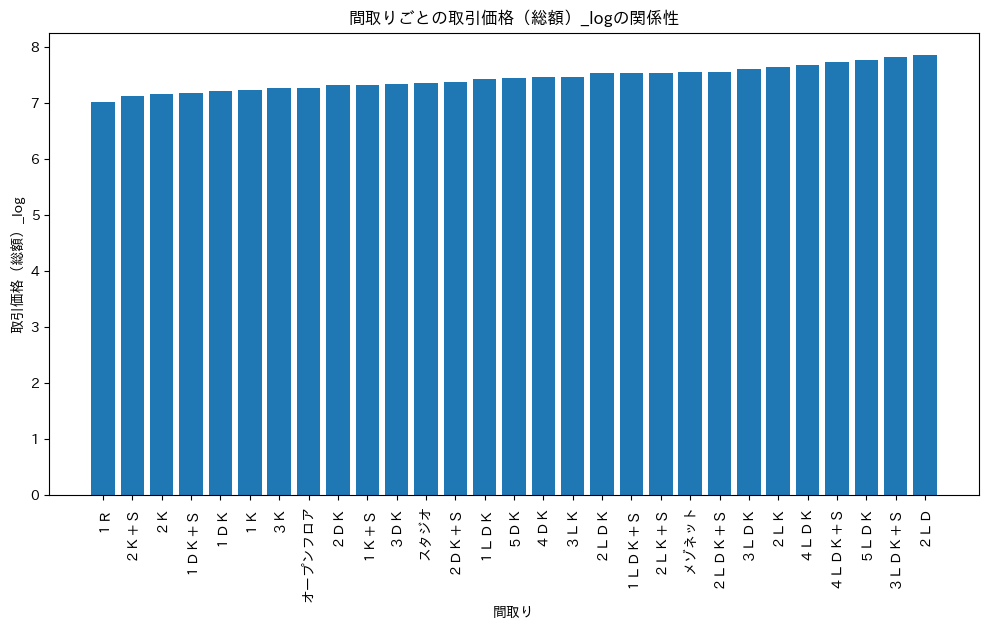

In [19]:
import matplotlib.pyplot as plt

# 間取りごとの取引価格（総額）_logの平均値を計算
df_ohta = df[df["市区町村名"] == "大田区"]
mean_price = df_ohta.groupby('間取り')['取引価格（総額）_log'].mean()

# 間取りを昇順にソート
sorted_mean_price = mean_price.sort_values()

# グラフの描画
plt.figure(figsize=(12, 6))
plt.bar(sorted_mean_price.index, sorted_mean_price)
plt.xlabel('間取り')
plt.ylabel('取引価格（総額）_log')
plt.title('間取りごとの取引価格（総額）_logの関係性')
plt.xticks(rotation=90)
plt.show()


In [20]:
df["間取り"].value_counts().index.tolist()

['３ＬＤＫ',
 '１Ｋ',
 '２ＬＤＫ',
 '４ＬＤＫ',
 '１ＬＤＫ',
 '２ＤＫ',
 '１ＤＫ',
 '３ＤＫ',
 '１Ｒ',
 'オープンフロア',
 '２ＬＤＫ＋Ｓ',
 '４ＤＫ',
 '２Ｋ',
 '１ＬＤＫ＋Ｓ',
 '３ＬＤＫ＋Ｓ',
 '５ＬＤＫ',
 '３Ｋ',
 '２ＤＫ＋Ｓ',
 '４ＬＤＫ＋Ｓ',
 '４Ｋ',
 '３ＬＫ',
 '５ＤＫ',
 '１ＤＫ＋Ｓ',
 'スタジオ',
 '３ＤＫ＋Ｓ',
 '６ＬＤＫ',
 'メゾネット',
 '５ＬＤＫ＋Ｓ',
 '１Ｋ＋Ｓ',
 '４ＤＫ＋Ｓ',
 '１Ｒ＋Ｓ',
 '２ＬＫ',
 '１ＬＫ',
 '２ＬＤ＋Ｓ',
 '２Ｋ＋Ｓ',
 '１Ｌ',
 '３ＬＤ',
 '４Ｌ＋Ｋ',
 '３ＬＤＫ＋Ｋ',
 '２ＬＫ＋Ｓ',
 '６ＤＫ',
 '３ＬＤ＋Ｓ',
 '７ＬＤＫ',
 '５Ｋ',
 '１ＬＤ＋Ｓ',
 '２Ｌ',
 '６ＬＤＫ＋Ｓ',
 '２ＬＤＫ＋Ｋ',
 '４ＬＤＫ＋Ｋ',
 '３Ｋ＋Ｓ',
 '７ＬＤＫ＋Ｓ',
 '８ＬＤＫ',
 '２Ｌ＋Ｓ',
 '１Ｌ＋Ｓ',
 '１ＤＫ＋Ｋ',
 '３Ｄ',
 '１ＬＤＫ＋Ｋ',
 '２ＬＤ',
 '２Ｄ',
 '１ＬＫ＋Ｓ',
 '５ＬＤＫ＋Ｋ',
 '４Ｄ',
 '８ＬＤＫ＋Ｓ',
 '４Ｌ',
 '３ＬＫ＋Ｓ',
 '７ＤＫ']

In [21]:
def normalize_area(area):
    if area == area:
        area = int(re.sub('m\^2未満|㎡以上', '', str(area)))
    return area

In [22]:
def convert_wareki_to_seireki(wareki):
    if wareki == wareki:
        if wareki == '戦前':
            wareki = '昭和20年'
        value = wareki[2:-1]
        if value == '元':
            value = 1
        else:
            value = int(value)
        if '昭和' in wareki:
            seireki = 1925+value
        elif '平成' in wareki:
            seireki = 1988+value
        elif '令和' in wareki:
            seireki = 2018+value
    else:
        seireki = wareki
    return seireki

In [23]:
df['取引時点_何年前'] = df['取引時点'].apply(lambda x: 2024-int(x[:4]))
df['建築年'] = df['建築年'].apply(lambda x: convert_wareki_to_seireki(x))
df['面積（㎡）'] = df['面積（㎡）'].apply(lambda x: normalize_area(x))
df['最寄駅：距離（分）'] = df['最寄駅：距離（分）'].apply(lambda x: normalize_moyori(x))

In [24]:
df.tail()

,ID,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,建築年,建物の構造,用途,今後の利用目的,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等,取引価格（総額）_log,取引時点_何年前
838750,47003396,沖縄県,浦添市,屋富祖,NaN,NaN,３ＬＤＫ,75,1995.0,ＲＣ,住宅,住宅,第１種住居地域,60.0,200.0,2023年第2四半期,未改装,NaN,NaN,1
838751,47005356,沖縄県,沖縄市,高原,NaN,NaN,１ＬＤＫ,45,1991.0,ＲＣ,NaN,その他,第１種中高層住居専用地域,60.0,200.0,2023年第3四半期,改装済,NaN,NaN,1
838752,47005578,沖縄県,沖縄市,比屋根,NaN,NaN,３ＬＤＫ,85,2002.0,ＲＣ,住宅,住宅,近隣商業地域,80.0,300.0,2023年第2四半期,未改装,NaN,NaN,1
838753,47005892,沖縄県,沖縄市,与儀,NaN,NaN,３ＬＤＫ,60,2017.0,ＲＣ,NaN,住宅,第１種住居地域,60.0,200.0,2023年第2四半期,未改装,NaN,NaN,1
838754,47006980,沖縄県,うるま市,字具志川,NaN,NaN,３ＬＤＫ,65,1989.0,ＲＣ,住宅,住宅,市街化区域及び市街化調整区域外の都市計画区域,60.0,200.0,2023年第2四半期,未改装,NaN,NaN,1


In [42]:
# 上記までを実行したdfをcsvで保存
# df.to_csv('transformed_df.csv', index=False)

In [42]:
# # データ受け取り
# df = pd.read_csv('transformed_df.csv')
# df.tail()

,ID,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,建築年,建物の構造,用途,今後の利用目的,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等,取引価格（総額）_log,取引時点_何年前
838750,47003396,沖縄県,浦添市,屋富祖,NaN,NaN,３ＬＤＫ,75,1995.0,ＲＣ,住宅,住宅,第１種住居地域,60.0,200.0,2023年第2四半期,未改装,NaN,NaN,1
838751,47005356,沖縄県,沖縄市,高原,NaN,NaN,１ＬＤＫ,45,1991.0,ＲＣ,NaN,その他,第１種中高層住居専用地域,60.0,200.0,2023年第3四半期,改装済,NaN,NaN,1
838752,47005578,沖縄県,沖縄市,比屋根,NaN,NaN,３ＬＤＫ,85,2002.0,ＲＣ,住宅,住宅,近隣商業地域,80.0,300.0,2023年第2四半期,未改装,NaN,NaN,1
838753,47005892,沖縄県,沖縄市,与儀,NaN,NaN,３ＬＤＫ,60,2017.0,ＲＣ,NaN,住宅,第１種住居地域,60.0,200.0,2023年第2四半期,未改装,NaN,NaN,1
838754,47006980,沖縄県,うるま市,字具志川,NaN,NaN,３ＬＤＫ,65,1989.0,ＲＣ,住宅,住宅,市街化区域及び市街化調整区域外の都市計画区域,60.0,200.0,2023年第2四半期,未改装,NaN,NaN,1


## 欠損値の補完(空白は欠損値とみなされていないため注意が必要)

### 欠損値をすべて'missing'で補完する場合

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838755 entries, 0 to 838754
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            838755 non-null  int64  
 1   都道府県名         838755 non-null  object 
 2   市区町村名         838755 non-null  object 
 3   地区名           838094 non-null  object 
 4   最寄駅：名称        835897 non-null  object 
 5   最寄駅：距離（分）     815471 non-null  float64
 6   間取り           805723 non-null  object 
 7   面積（㎡）         838755 non-null  int64  
 8   建築年           814180 non-null  float64
 9   建物の構造         813416 non-null  object 
 10  用途            738736 non-null  object 
 11  今後の利用目的       468423 non-null  object 
 12  都市計画          817174 non-null  object 
 13  建ぺい率（％）       812216 non-null  float64
 14  容積率（％）        812216 non-null  float64
 15  取引時点          838755 non-null  object 
 16  改装            752581 non-null  object 
 17  取引の事情等        19808 non-null   object 
 18  取引価格

もし欠損値処理をするなら・・・ \
そのまま（意味をなさないもので補完する）・・・地区名、最寄駅：名称、改装、取引の事情等 \
最頻値補完・・・間取り、建物の構造、用途、今後の利用目的、都市計画 \
中央値補完or他の特徴量を用いて予測して補完・・・最寄駅：距離（分）、建築年、建ぺい率（％）、容積率（％）

In [34]:
df.isnull().sum()

ID                   0
都道府県名                0
市区町村名                0
地区名                661
最寄駅：名称            2858
最寄駅：距離（分）        23284
間取り              33032
面積（㎡）                0
建築年              24575
建物の構造            25339
用途              100019
今後の利用目的         370332
都市計画             21581
建ぺい率（％）          26539
容積率（％）           26539
取引時点                 0
改装               86174
取引の事情等          818947
取引価格（総額）_log     18738
取引時点_何年前             0
dtype: int64

そのまま（意味をなさないもので補完する）

In [25]:
df["地区名"].fillna('不明', inplace=True)
df["最寄駅：名称"].fillna('不明', inplace=True)
df["改装"].fillna('不明', inplace=True)
df["取引の事情等"].fillna('不明', inplace=True)

最頻値補完

In [26]:
df["間取り"].fillna(df["間取り"].mode()[0], inplace=True)
df["建物の構造"].fillna(df["建物の構造"].mode()[0], inplace=True)
df["用途"].fillna(df["用途"].mode()[0], inplace=True)
df["今後の利用目的"].fillna(df["今後の利用目的"].mode()[0], inplace=True)
df["都市計画"].fillna(df["都市計画"].mode()[0], inplace=True)

中央値補完する

In [92]:
# df["最寄駅：距離（分）"].fillna(df["最寄駅：距離（分）"].median(), inplace=True)
# df["建築年"].fillna(df["建築年"].median(), inplace=True)
# df["建ぺい率（％）"].fillna(df["建ぺい率（％）"].median(), inplace=True)
# df["容積率（％）"].fillna(df["容積率（％）"].median(), inplace=True)

### 他の特徴量を用いて予測し、数値の欠損値を補完する場合  
最寄駅：距離（分）、建築年、建ぺい率（％）、容積率（％）のそれぞれの欠損値を他の特徴量を用いて予測する

In [27]:
df.columns

Index(['ID', '都道府県名', '市区町村名', '地区名', '最寄駅：名称', '最寄駅：距離（分）', '間取り', '面積（㎡）',
       '建築年', '建物の構造', '用途', '今後の利用目的', '都市計画', '建ぺい率（％）', '容積率（％）', '取引時点',
       '改装', '取引の事情等', '取引価格（総額）_log', '取引時点_何年前'],
      dtype='object')

In [29]:
# # dfをtrain_dfとtest_dfに再分割
# train_df = df[:len(train_df)]
# test_df = df[len(train_df):]

In [ ]:
#df_moyoriを定義
df_moyori=df[['最寄駅：距離（分）', '都道府県名', '市区町村名', '地区名', '最寄駅：名称', '間取り', '建物の構造', '用途', '今後の利用目的', '都市計画', '取引時点', '改装', '取引の事情等', '取引時点_何年前']]
cat_cols = ['都道府県名', '市区町村名', '地区名', '最寄駅：名称', '間取り', '建物の構造', '用途', '今後の利用目的', '取引時点', '都市計画', '改装', '取引の事情等']
import category_encoders as ce
for column in cat_cols:
    count_encoder = ce.CountEncoder(cols=[column])
    df_moyori[column] = count_encoder.fit_transform(df_moyori[column])

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [30]:
#df_moyoriの'最寄駅：距離（分）'を予測
exist=df_moyori[df_moyori["最寄駅：距離（分）"].notnull()]
nonexist=df_moyori[df_moyori["最寄駅：距離（分）"].isnull()]

X=exist.iloc[:,1:].values
y=exist.iloc[:,0].values

X_test=nonexist.iloc[:,1:].values

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)
rfr = RandomForestRegressor(random_state=42, n_estimators=100, n_jobs=-1)
rfr.fit(X, y)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [31]:
print('Train Score: {}'.format(round(rfr.score(X_train, y_train), 3)))
print(' Test Score: {}'.format(round(rfr.score(X_valid, y_valid), 3)))

Train Score: 0.975
 Test Score: 0.976


In [32]:
#'最寄駅：距離（分）'を補充
pred=rfr.predict(X_test)
df.loc[df["最寄駅：距離（分）"].isnull(),'最寄駅：距離（分）']=pred
df.tail()

,ID,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,建築年,建物の構造,用途,今後の利用目的,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等,取引価格（総額）_log,取引時点_何年前
838750,47003396,沖縄県,浦添市,屋富祖,不明,63.00,３ＬＤＫ,75,1995.0,ＲＣ,住宅,住宅,第１種住居地域,60.0,200.0,2023年第2四半期,未改装,不明,NaN,1
838751,47005356,沖縄県,沖縄市,高原,不明,50.74,１ＬＤＫ,45,1991.0,ＲＣ,住宅,その他,第１種中高層住居専用地域,60.0,200.0,2023年第3四半期,改装済,不明,NaN,1
838752,47005578,沖縄県,沖縄市,比屋根,不明,56.63,３ＬＤＫ,85,2002.0,ＲＣ,住宅,住宅,近隣商業地域,80.0,300.0,2023年第2四半期,未改装,不明,NaN,1
838753,47005892,沖縄県,沖縄市,与儀,不明,57.73,３ＬＤＫ,60,2017.0,ＲＣ,住宅,住宅,第１種住居地域,60.0,200.0,2023年第2四半期,未改装,不明,NaN,1
838754,47006980,沖縄県,うるま市,字具志川,不明,54.35,３ＬＤＫ,65,1989.0,ＲＣ,住宅,住宅,市街化区域及び市街化調整区域外の都市計画区域,60.0,200.0,2023年第2四半期,未改装,不明,NaN,1


In [ ]:
#df_kentikunenを定義
df_kentikunen=df[['建築年', '都道府県名', '市区町村名', '地区名', '最寄駅：名称', '間取り', '建物の構造', '用途', '今後の利用目的', '都市計画', '取引時点', '改装', '取引の事情等', '取引時点_何年前']]
cat_cols = ['都道府県名', '市区町村名', '地区名', '最寄駅：名称', '間取り', '建物の構造', '用途', '今後の利用目的', '取引時点', '都市計画', '改装', '取引の事情等']
import category_encoders as ce
for column in cat_cols:
    count_encoder = ce.CountEncoder(cols=[column])
    df_kentikunen[column] = count_encoder.fit_transform(df_kentikunen[column])

In [34]:
#df_kentikunenの'建築年'を予測
exist=df_kentikunen[df_kentikunen['建築年'].notnull()]
nonexist=df_kentikunen[df_kentikunen['建築年'].isnull()]

X=exist.iloc[:,1:].values
y=exist.iloc[:,0].values

X_test=nonexist.iloc[:,1:].values

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)
rfr = RandomForestRegressor(random_state=42, n_estimators=100, n_jobs=-1)
rfr.fit(X, y)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [35]:
print('Train Score: {}'.format(round(rfr.score(X_train, y_train), 3)))
print(' Test Score: {}'.format(round(rfr.score(X_valid, y_valid), 3)))

Train Score: 0.928
 Test Score: 0.927


In [36]:
#'建築年'を補充
pred=rfr.predict(X_test)
df.loc[df['建築年'].isnull(),'建築年']=pred
df.tail()

,ID,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,建築年,建物の構造,用途,今後の利用目的,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等,取引価格（総額）_log,取引時点_何年前
838750,47003396,沖縄県,浦添市,屋富祖,不明,63.00,３ＬＤＫ,75,1995.0,ＲＣ,住宅,住宅,第１種住居地域,60.0,200.0,2023年第2四半期,未改装,不明,NaN,1
838751,47005356,沖縄県,沖縄市,高原,不明,50.74,１ＬＤＫ,45,1991.0,ＲＣ,住宅,その他,第１種中高層住居専用地域,60.0,200.0,2023年第3四半期,改装済,不明,NaN,1
838752,47005578,沖縄県,沖縄市,比屋根,不明,56.63,３ＬＤＫ,85,2002.0,ＲＣ,住宅,住宅,近隣商業地域,80.0,300.0,2023年第2四半期,未改装,不明,NaN,1
838753,47005892,沖縄県,沖縄市,与儀,不明,57.73,３ＬＤＫ,60,2017.0,ＲＣ,住宅,住宅,第１種住居地域,60.0,200.0,2023年第2四半期,未改装,不明,NaN,1
838754,47006980,沖縄県,うるま市,字具志川,不明,54.35,３ＬＤＫ,65,1989.0,ＲＣ,住宅,住宅,市街化区域及び市街化調整区域外の都市計画区域,60.0,200.0,2023年第2四半期,未改装,不明,NaN,1


In [ ]:
#df_kenpeiを定義
df_kenpei=df[['建ぺい率（％）', '都道府県名', '市区町村名', '地区名', '最寄駅：名称', '間取り', '建物の構造', '用途', '今後の利用目的', '都市計画', '取引時点', '改装', '取引の事情等', '取引時点_何年前']]
cat_cols = ['都道府県名', '市区町村名', '地区名', '最寄駅：名称', '間取り', '建物の構造', '用途', '今後の利用目的', '取引時点', '都市計画', '改装', '取引の事情等']
import category_encoders as ce
for column in cat_cols:
    count_encoder = ce.CountEncoder(cols=[column])
    df_kenpei[column] = count_encoder.fit_transform(df_kenpei[column])

In [38]:
#df_kenpeiの'建ぺい率（％）'を予測
exist=df_kenpei[df_kenpei['建ぺい率（％）'].notnull()]
nonexist=df_kenpei[df_kenpei['建ぺい率（％）'].isnull()]

X=exist.iloc[:,1:].values
y=exist.iloc[:,0].values

X_test=nonexist.iloc[:,1:].values

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)
rfr = RandomForestRegressor(random_state=42, n_estimators=100, n_jobs=-1)
rfr.fit(X, y)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [39]:
print('Train Score: {}'.format(round(rfr.score(X_train, y_train), 3)))
print(' Test Score: {}'.format(round(rfr.score(X_valid, y_valid), 3)))

Train Score: 0.997
 Test Score: 0.997


In [40]:
#'建ぺい率（％）'を補充
pred=rfr.predict(X_test)
df.loc[df['建ぺい率（％）'].isnull(),'建ぺい率（％）']=pred
df.tail()

,ID,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,建築年,建物の構造,用途,今後の利用目的,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等,取引価格（総額）_log,取引時点_何年前
838750,47003396,沖縄県,浦添市,屋富祖,不明,63.00,３ＬＤＫ,75,1995.0,ＲＣ,住宅,住宅,第１種住居地域,60.0,200.0,2023年第2四半期,未改装,不明,NaN,1
838751,47005356,沖縄県,沖縄市,高原,不明,50.74,１ＬＤＫ,45,1991.0,ＲＣ,住宅,その他,第１種中高層住居専用地域,60.0,200.0,2023年第3四半期,改装済,不明,NaN,1
838752,47005578,沖縄県,沖縄市,比屋根,不明,56.63,３ＬＤＫ,85,2002.0,ＲＣ,住宅,住宅,近隣商業地域,80.0,300.0,2023年第2四半期,未改装,不明,NaN,1
838753,47005892,沖縄県,沖縄市,与儀,不明,57.73,３ＬＤＫ,60,2017.0,ＲＣ,住宅,住宅,第１種住居地域,60.0,200.0,2023年第2四半期,未改装,不明,NaN,1
838754,47006980,沖縄県,うるま市,字具志川,不明,54.35,３ＬＤＫ,65,1989.0,ＲＣ,住宅,住宅,市街化区域及び市街化調整区域外の都市計画区域,60.0,200.0,2023年第2四半期,未改装,不明,NaN,1


In [ ]:
#df_yousekiを定義
df_youseki=df[['容積率（％）', '都道府県名', '市区町村名', '地区名', '最寄駅：名称', '間取り', '建物の構造', '用途', '今後の利用目的', '都市計画', '取引時点', '改装', '取引の事情等', '取引時点_何年前']]
cat_cols = ['都道府県名', '市区町村名', '地区名', '最寄駅：名称', '間取り', '建物の構造', '用途', '今後の利用目的', '取引時点', '都市計画', '改装', '取引の事情等']
import category_encoders as ce
for column in cat_cols:
    count_encoder = ce.CountEncoder(cols=[column])
    df_youseki[column] = count_encoder.fit_transform(df_youseki[column])

In [42]:
#df_yousekiの'容積率（％）'を予測
exist=df_youseki[df_youseki['容積率（％）'].notnull()]
nonexist=df_youseki[df_youseki['容積率（％）'].isnull()]

X=exist.iloc[:,1:].values
y=exist.iloc[:,0].values

X_test=nonexist.iloc[:,1:].values

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)
rfr = RandomForestRegressor(random_state=42, n_estimators=100, n_jobs=-1)
rfr.fit(X, y)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [43]:
print('Train Score: {}'.format(round(rfr.score(X_train, y_train), 3)))
print(' Test Score: {}'.format(round(rfr.score(X_valid, y_valid), 3)))

Train Score: 0.988
 Test Score: 0.989


In [44]:
#'容積率（％）'を補充
pred=rfr.predict(X_test)
df.loc[df['容積率（％）'].isnull(),'容積率（％）']=pred
df.tail()

,ID,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,建築年,建物の構造,用途,今後の利用目的,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等,取引価格（総額）_log,取引時点_何年前
838750,47003396,沖縄県,浦添市,屋富祖,不明,63.00,３ＬＤＫ,75,1995.0,ＲＣ,住宅,住宅,第１種住居地域,60.0,200.0,2023年第2四半期,未改装,不明,NaN,1
838751,47005356,沖縄県,沖縄市,高原,不明,50.74,１ＬＤＫ,45,1991.0,ＲＣ,住宅,その他,第１種中高層住居専用地域,60.0,200.0,2023年第3四半期,改装済,不明,NaN,1
838752,47005578,沖縄県,沖縄市,比屋根,不明,56.63,３ＬＤＫ,85,2002.0,ＲＣ,住宅,住宅,近隣商業地域,80.0,300.0,2023年第2四半期,未改装,不明,NaN,1
838753,47005892,沖縄県,沖縄市,与儀,不明,57.73,３ＬＤＫ,60,2017.0,ＲＣ,住宅,住宅,第１種住居地域,60.0,200.0,2023年第2四半期,未改装,不明,NaN,1
838754,47006980,沖縄県,うるま市,字具志川,不明,54.35,３ＬＤＫ,65,1989.0,ＲＣ,住宅,住宅,市街化区域及び市街化調整区域外の都市計画区域,60.0,200.0,2023年第2四半期,未改装,不明,NaN,1


In [45]:
df.isnull().sum()

ID                  0
都道府県名               0
市区町村名               0
地区名                 0
最寄駅：名称              0
最寄駅：距離（分）           0
間取り                 0
面積（㎡）               0
建築年                 0
建物の構造               0
用途                  0
今後の利用目的             0
都市計画                0
建ぺい率（％）             0
容積率（％）              0
取引時点                0
改装                  0
取引の事情等              0
取引価格（総額）_log    18738
取引時点_何年前            0
dtype: int64

In [58]:
# 欠損値をすべて埋めたデータを保存する
# df.to_csv('filled_df.csv', index=False)

In [66]:
# # 欠損値処理とカテゴリカル変数処理後のデータ
# df = pd.read_csv('filled_df.csv')
# df.tail()

,ID,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,建築年,建物の構造,用途,今後の利用目的,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等,取引価格（総額）_log,取引時点_何年前
838750,47003396,沖縄県,浦添市,屋富祖,不明,64.50,３ＬＤＫ,75,1995.0,ＲＣ,住宅,住宅,第１種住居地域,60.0,200.0,2023年第2四半期,未改装,不明,NaN,1
838751,47005356,沖縄県,沖縄市,高原,不明,53.11,１ＬＤＫ,45,1991.0,ＲＣ,住宅,その他,第１種中高層住居専用地域,60.0,200.0,2023年第3四半期,改装済,不明,NaN,1
838752,47005578,沖縄県,沖縄市,比屋根,不明,50.23,３ＬＤＫ,85,2002.0,ＲＣ,住宅,住宅,近隣商業地域,80.0,300.0,2023年第2四半期,未改装,不明,NaN,1
838753,47005892,沖縄県,沖縄市,与儀,不明,57.50,３ＬＤＫ,60,2017.0,ＲＣ,住宅,住宅,第１種住居地域,60.0,200.0,2023年第2四半期,未改装,不明,NaN,1
838754,47006980,沖縄県,うるま市,字具志川,不明,51.44,３ＬＤＫ,65,1989.0,ＲＣ,住宅,住宅,市街化区域及び市街化調整区域外の都市計画区域,60.0,200.0,2023年第2四半期,未改装,不明,NaN,1


以下のデータの分布をみてみると標準化をした方が良いかもしれない

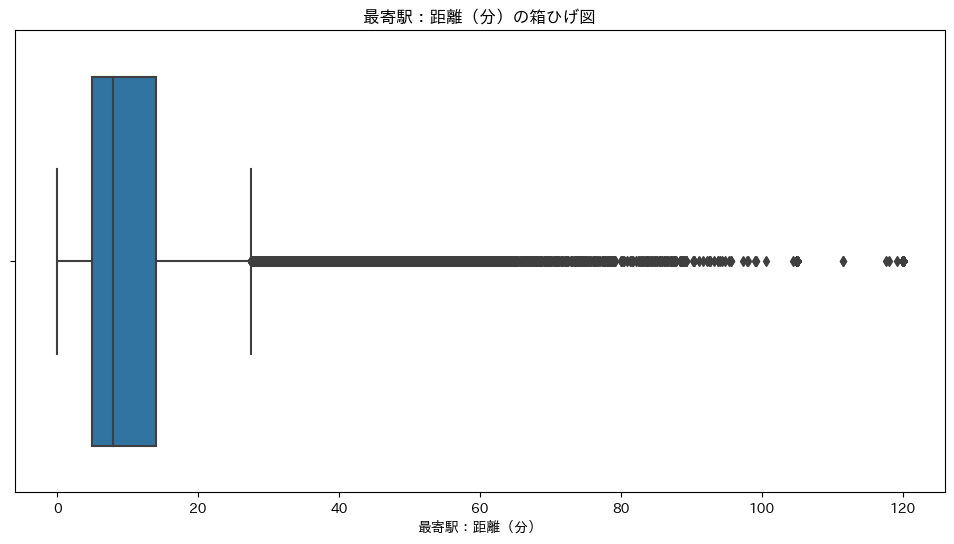

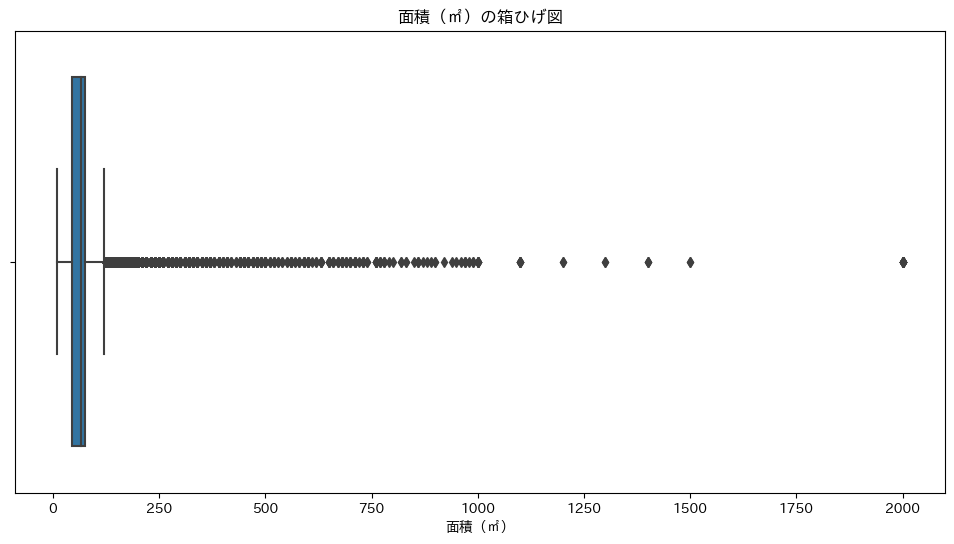

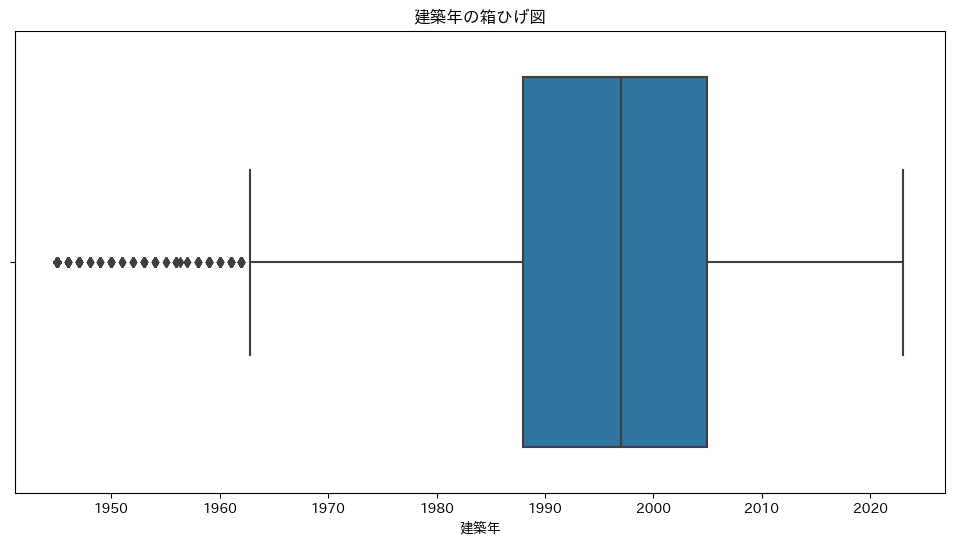

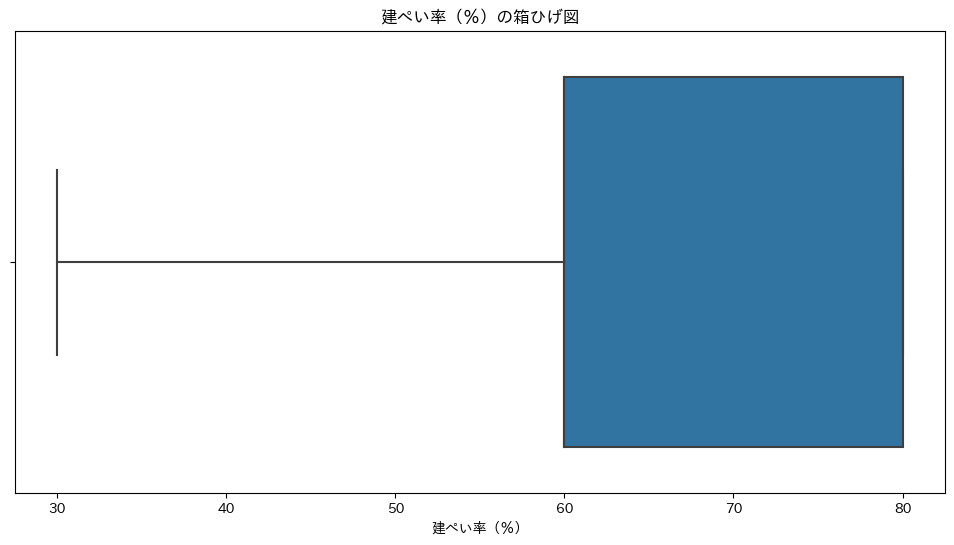

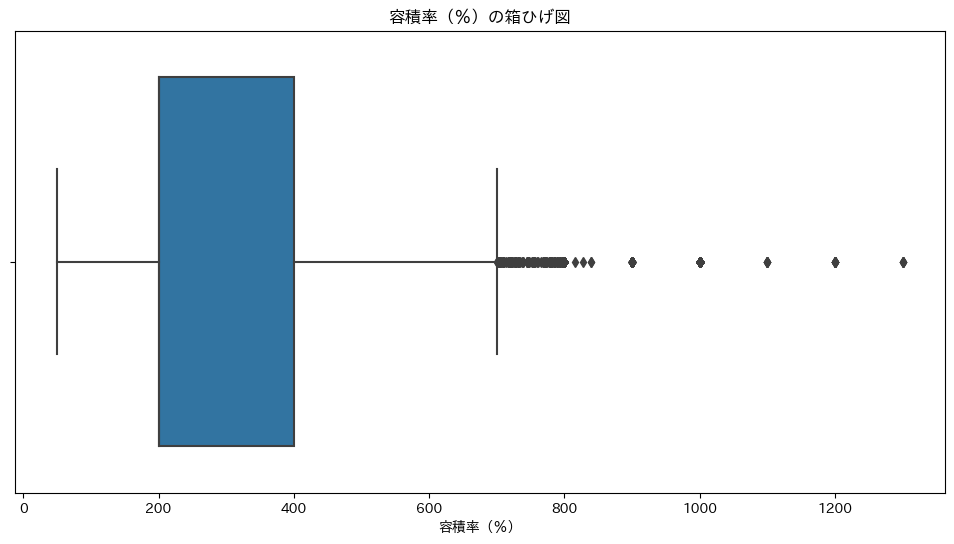

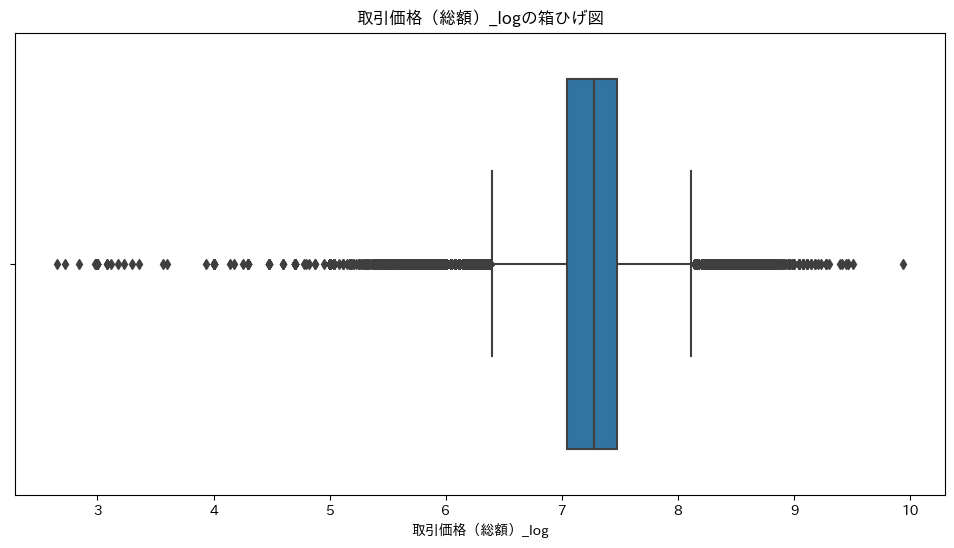

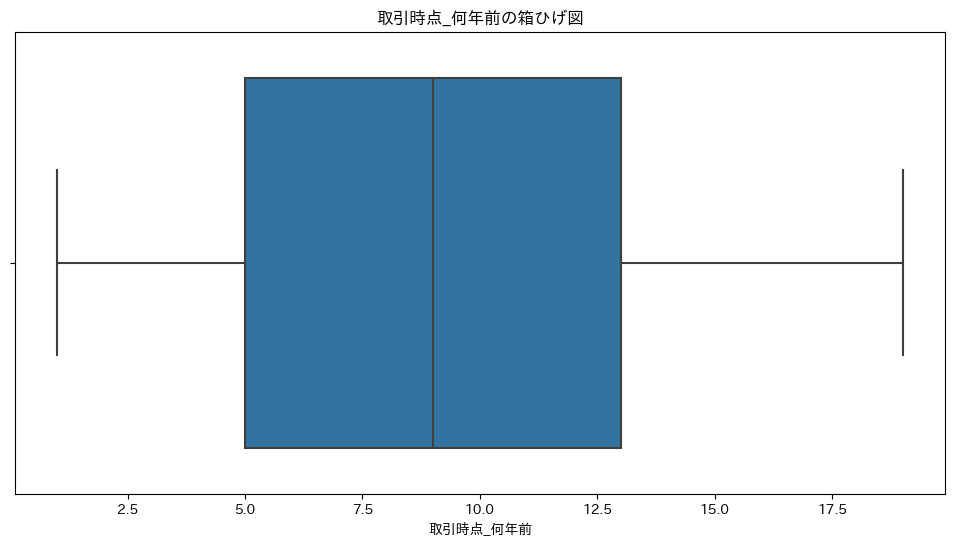

In [46]:
# int型, float型の特徴量についての箱ひげ図を描画
num_cols = ["最寄駅：距離（分）", "面積（㎡）", "建築年", "建ぺい率（％）", "容積率（％）", "取引価格（総額）_log", "取引時点_何年前"]
for col in num_cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x=col)
    plt.title(f'{col}の箱ひげ図')
    plt.show()

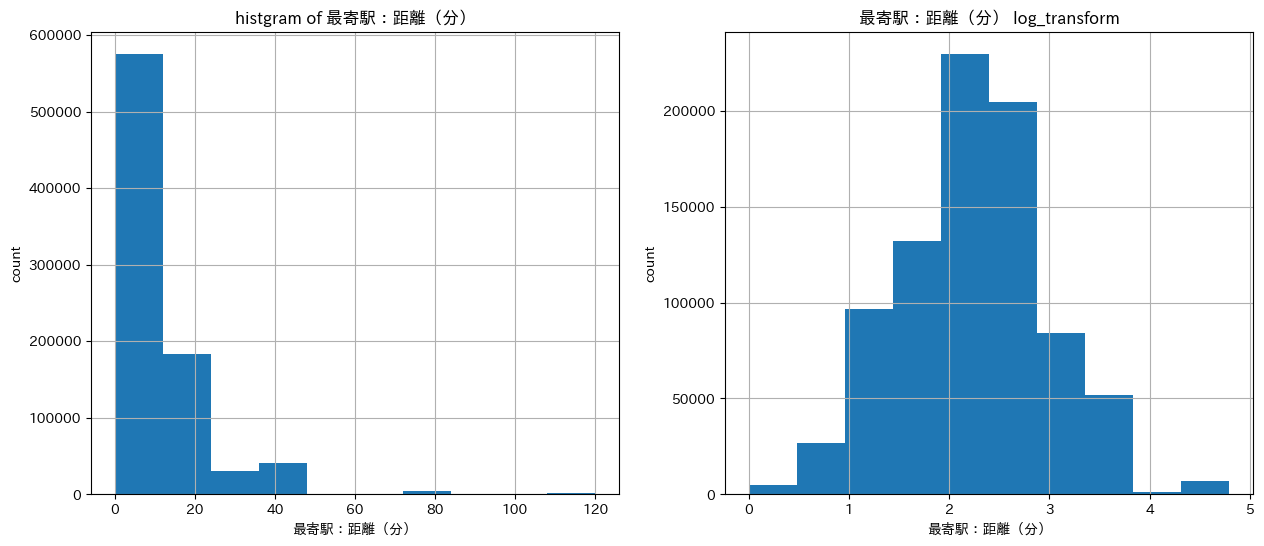

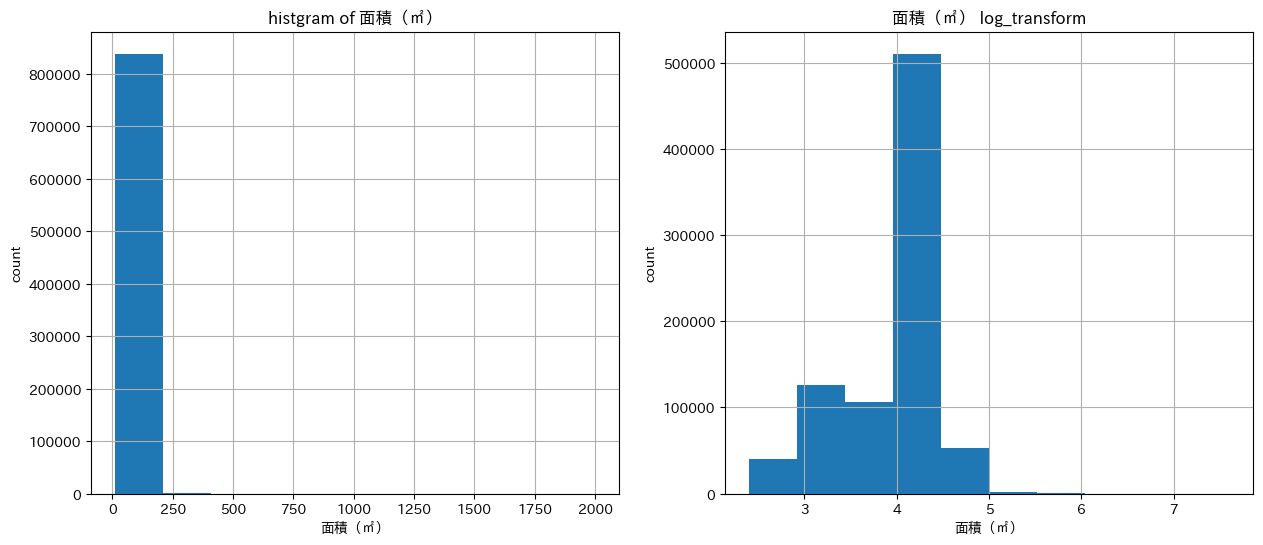

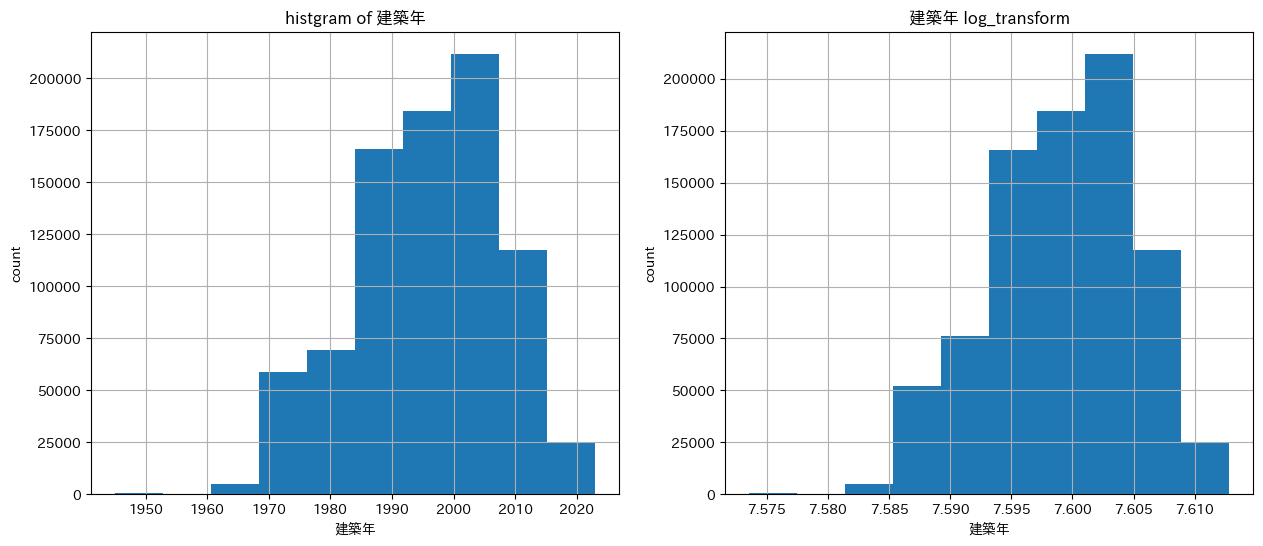

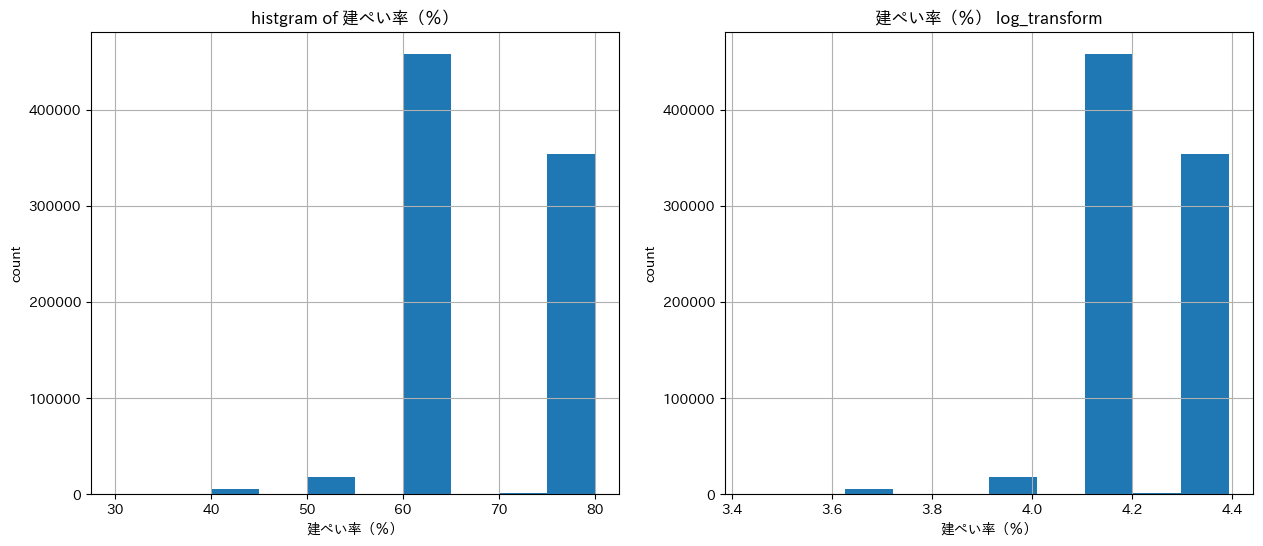

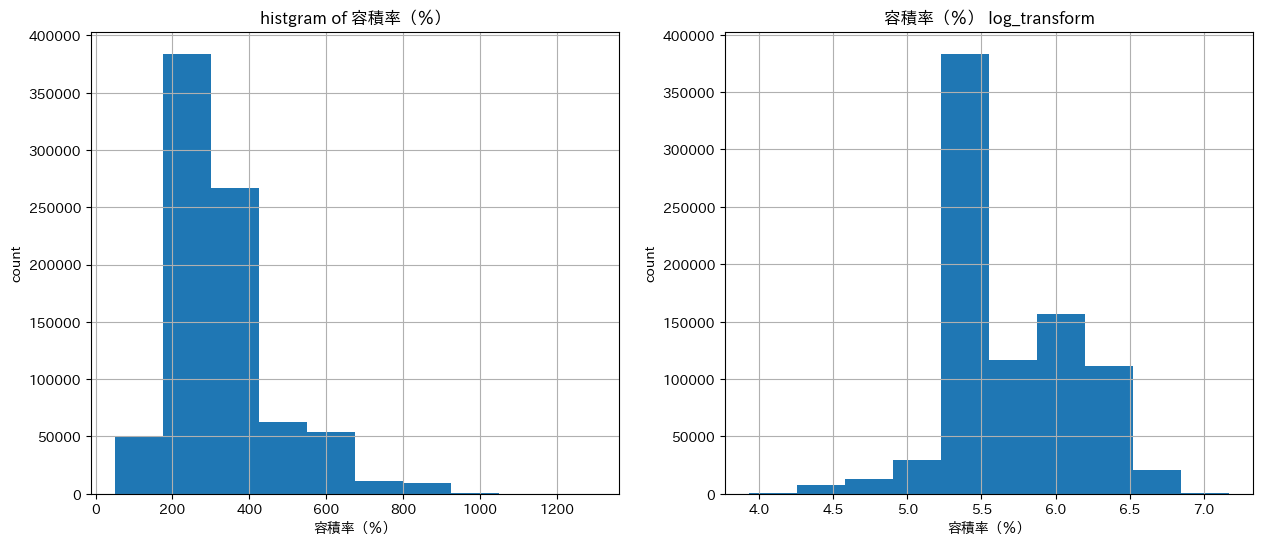

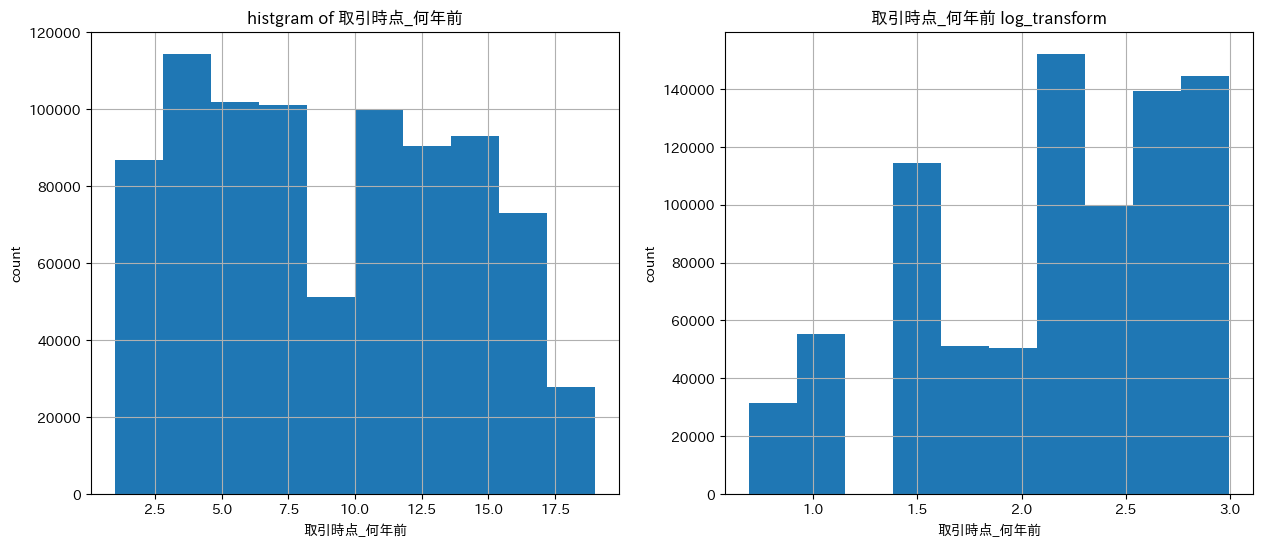

In [47]:
# 箱ひげ図を描画（左は対数変換前、右は対数変換後）
for i in ["最寄駅：距離（分）", "面積（㎡）", "建築年", "建ぺい率（％）", "容積率（％）", "取引時点_何年前"]:
    fig, ax = plt.subplots(ncols=2, figsize=(15,6))
    ax[0].hist(x=df[i])
    ax[0].set(title='histgram of '+i, xlabel=i, ylabel='count')
    ax[0].grid()

    ax[1].hist(x=df[i].apply(np.log1p))
    ax[1].set(title=i+' log_transform', xlabel=i, ylabel='count')
    ax[1].grid()

## カテゴリカル変数の数値化

### 全ての特徴量をダミー化した場合->実行時間の関係で不可能

In [48]:
# object型の特徴量に絞る
cat_cols = df.select_dtypes(include=object).columns.tolist()
cat_cols

['都道府県名',
 '市区町村名',
 '地区名',
 '最寄駅：名称',
 '間取り',
 '建物の構造',
 '用途',
 '今後の利用目的',
 '都市計画',
 '取引時点',
 '改装',
 '取引の事情等']

In [38]:
# df = pd.get_dummies(df, columns=obj_cols, drop_first=True)
# df.head()

### 特徴量エンジニアリング追加

In [49]:
df["面積（㎡）容積率（％）_combi"] = df["面積（㎡）"] * df["容積率（％）"] / 100

In [50]:
# 「取引時点」カラムをエンコードして、各ユニークな取引時点を整数に変換する処理
enc_dic = {}
for i, e in enumerate(sorted(list(set(df['取引時点'].values)))):
    enc_dic[e] = i
df['取引時点_enc'] = df['取引時点'].map(enc_dic)

In [51]:
# 時間的な特徴と地域（都道府県名）に基づいたターゲット変数の過去の平均値を計算し、それを辞書に保存する
te_dic = {}
time_col = '取引時点_enc'
group_col = '都道府県名'

for i in set(df[time_col].values):
    tmp_df = df[df[time_col] < i]
    te_dic[i] = tmp_df.groupby(group_col)["取引価格（総額）_log"].agg('mean').to_dict()

te_dic[50]

{'三重県': 7.099989772836439,
 '京都府': 7.155935848555253,
 '佐賀県': 7.009937258263509,
 '兵庫県': 7.157742870483196,
 '北海道': 6.965967793677859,
 '千葉県': 7.155825324964995,
 '和歌山県': 7.022690210815773,
 '埼玉県': 7.1697442713966355,
 '大分県': 6.911537826573079,
 '大阪府': 7.158352973821201,
 '奈良県': 7.056884610234688,
 '宮城県': 7.0395442538048805,
 '宮崎県': 6.958678653711235,
 '富山県': 7.0469200713870155,
 '山口県': 7.045342730349803,
 '山形県': 7.087990602814902,
 '山梨県': 6.848839888686708,
 '岐阜県': 7.078095913486453,
 '岡山県': 7.03809073492747,
 '岩手県': 6.925002679060599,
 '島根県': 7.165376214700312,
 '広島県': 7.093449021655064,
 '徳島県': 6.912051981629745,
 '愛媛県': 6.966433011596662,
 '愛知県': 7.107301969238601,
 '新潟県': 6.913835156235044,
 '東京都': 7.377929204641064,
 '栃木県': 6.950636958071011,
 '沖縄県': 7.160046604428336,
 '滋賀県': 7.16602695816839,
 '熊本県': 6.970182251843263,
 '石川県': 6.929363348877185,
 '神奈川県': 7.2581182672098175,
 '福井県': 6.979575815840195,
 '福岡県': 6.992264905042226,
 '福島県': 6.9743805791401785,
 '秋田県': 6.9413137471126

In [52]:
time_col = '取引時点_enc'
group_col = '都道府県名'

def calc_te(row):
    if row[time_col] in te_dic and row[group_col] in te_dic[row[time_col]]:
        return te_dic[row[time_col]][row[group_col]]
    else:
        return 0

df[group_col+'_te'] = df.apply(calc_te, axis=1)
df.head(2)

,ID,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,建築年,建物の構造,...,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等,取引価格（総額）_log,取引時点_何年前,面積（㎡）容積率（％）_combi,取引時点_enc,都道府県名_te
0,1000248,北海道,札幌市中央区,大通西,西１８丁目,1.0,１ＤＫ,25,1986.000000,ＳＲＣ,...,80.0,400.0,2009年第3四半期,未改装,不明,6.579784,15,100.0,16,6.939667
1,1052783,北海道,札幌市豊平区,平岸７条,南平岸,14.0,２ＬＤＫ＋Ｓ,50,2003.678333,ＲＣ,...,80.0,401.0,2015年第1四半期,未改装,不明,6.612784,9,200.5,38,6.942449


In [53]:
from itertools import product
agg_dfs = []

def get_agg_df(df, group_col):
    agg_cols = ["最寄駅：距離（分）", "面積（㎡）", "建ぺい率（％）", "容積率（％）"]
    cols = [group_col] + agg_cols
    agg_df = df[cols].copy()
    functions = ["count", "mean", "min", "max"]
    for col, function in product(agg_cols, functions):
        col_name = f"{col}_{function}"
        agg_df[col_name] = agg_df.groupby(group_col)[col].transform(function)
    return agg_df.drop(cols, axis = 1)

group_col = '市区町村名'
agg_df = get_agg_df(df, group_col)
df = pd.concat([df, agg_df], axis=1)
df.head(2)

,ID,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,建築年,建物の構造,...,面積（㎡）_min,面積（㎡）_max,建ぺい率（％）_count,建ぺい率（％）_mean,建ぺい率（％）_min,建ぺい率（％）_max,容積率（％）_count,容積率（％）_mean,容積率（％）_min,容積率（％）_max
0,1000248,北海道,札幌市中央区,大通西,西１８丁目,1.0,１ＤＫ,25,1986.000000,ＳＲＣ,...,10,260,7686,74.207780,40.0,80.0,7686,328.191959,60.0,800.0
1,1052783,北海道,札幌市豊平区,平岸７条,南平岸,14.0,２ＬＤＫ＋Ｓ,50,2003.678333,ＲＣ,...,15,260,3694,66.742501,40.0,80.0,3694,255.539253,80.0,900.0


In [54]:
# 建築年から築年数を算出する
df['築年数'] = 2024 - df['建築年']
df.head()

,ID,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,建築年,建物の構造,...,面積（㎡）_max,建ぺい率（％）_count,建ぺい率（％）_mean,建ぺい率（％）_min,建ぺい率（％）_max,容積率（％）_count,容積率（％）_mean,容積率（％）_min,容積率（％）_max,築年数
0,1000248,北海道,札幌市中央区,大通西,西１８丁目,1.0,１ＤＫ,25,1986.000000,ＳＲＣ,...,260,7686,74.207780,40.0,80.0,7686,328.191959,60.0,800.0,38.000000
1,1052783,北海道,札幌市豊平区,平岸７条,南平岸,14.0,２ＬＤＫ＋Ｓ,50,2003.678333,ＲＣ,...,260,3694,66.742501,40.0,80.0,3694,255.539253,80.0,900.0,20.321667
2,1026319,北海道,札幌市東区,北８条東,札幌(ＪＲ),8.0,１Ｋ,15,1991.000000,ＲＣ,...,210,1671,67.928606,50.0,80.0,1671,264.874676,150.0,600.0,33.000000
3,1095145,北海道,札幌市清田区,美しが丘３条,福住,75.0,４ＬＤＫ,80,1995.000000,ＲＣ,...,220,565,57.423363,40.0,80.0,565,182.968732,60.0,496.0,29.000000
4,1093724,北海道,函館市,本町,中央病院前,2.0,２ＬＤＫ,70,1991.000000,ＲＣ,...,135,824,71.079854,50.0,80.0,824,320.399272,60.0,800.0,33.000000


In [55]:
# 消費税を考慮して取引時点をビン化する
# 四半期の始まりを示す日付を生成
df['取引時点_日付'] = pd.to_datetime(df['取引時点'].str.replace('年第1四半期', '-01-01').str.replace('年第2四半期', '-04-01')
                              .str.replace('年第3四半期', '-07-01').str.replace('年第4四半期', '-10-01'))

In [56]:
# 消費税率を割り当てる関数
def assign_tax_rate(date):
    if date < pd.Timestamp('1997-04-01'):
        return 3
    elif date < pd.Timestamp('2014-04-01'):
        return 5
    elif date < pd.Timestamp('2019-10-01'):
        return 8
    else:
        return 10

# 消費税率の列を追加
df['消費税率'] = df['取引時点_日付'].apply(assign_tax_rate)

In [57]:
# 取引時点_日付の特徴量を削除する
df.drop('取引時点_日付', axis=1, inplace=True)
df.head()

,ID,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,建築年,建物の構造,...,建ぺい率（％）_count,建ぺい率（％）_mean,建ぺい率（％）_min,建ぺい率（％）_max,容積率（％）_count,容積率（％）_mean,容積率（％）_min,容積率（％）_max,築年数,消費税率
0,1000248,北海道,札幌市中央区,大通西,西１８丁目,1.0,１ＤＫ,25,1986.000000,ＳＲＣ,...,7686,74.207780,40.0,80.0,7686,328.191959,60.0,800.0,38.000000,5
1,1052783,北海道,札幌市豊平区,平岸７条,南平岸,14.0,２ＬＤＫ＋Ｓ,50,2003.678333,ＲＣ,...,3694,66.742501,40.0,80.0,3694,255.539253,80.0,900.0,20.321667,8
2,1026319,北海道,札幌市東区,北８条東,札幌(ＪＲ),8.0,１Ｋ,15,1991.000000,ＲＣ,...,1671,67.928606,50.0,80.0,1671,264.874676,150.0,600.0,33.000000,5
3,1095145,北海道,札幌市清田区,美しが丘３条,福住,75.0,４ＬＤＫ,80,1995.000000,ＲＣ,...,565,57.423363,40.0,80.0,565,182.968732,60.0,496.0,29.000000,5
4,1093724,北海道,函館市,本町,中央病院前,2.0,２ＬＤＫ,70,1991.000000,ＲＣ,...,824,71.079854,50.0,80.0,824,320.399272,60.0,800.0,33.000000,8


In [76]:
# # https://region-case.com/rank-r3-pref-resident-landprice/ 令和3年の都道府県別の住宅価格ランキングをもとに住宅価格のランキングで都道府県を分割する。
# prefectures = ["東京都", "神奈川県", "大阪府", "埼玉県", "京都府", "兵庫県", "愛知県", "千葉県", "静岡県", "沖縄県", "広島県", "福岡県", "奈良県", "滋賀県", "石川県", "宮城県", "和歌山県", "愛媛県", "香川県", "茨城県", "栃木県", "岐阜県", "群馬県", "富山県", "高知県", "福井県", "徳島県", "岡山県", "熊本県", "三重県", "鹿児島県", "新潟県", "山口県", "岩手県", "大分県", "長野県", "長崎県", "宮崎県", "山梨県", "福島県", "北海道", "佐賀県", "島根県", "山形県", "鳥取県", "青森県", "秋田県"]
# rank_lst = list(range(1, 48))
# df['R3_house_price_rank'] = df['都道府県名'].replace(prefectures, rank_lst, inplace=False)
# df.head()

In [59]:
# 間取りごとの取引価格（総額）_logの平均を取った特徴量を作成する
df['madori_mean'] = df['間取り']
mapping_dic = df.groupby('間取り')["取引価格（総額）_log"].mean().to_dict()
df['madori_mean'] = df['madori_mean'].replace(mapping_dic)
df.head()

,ID,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,建築年,建物の構造,...,建ぺい率（％）_mean,建ぺい率（％）_min,建ぺい率（％）_max,容積率（％）_count,容積率（％）_mean,容積率（％）_min,容積率（％）_max,築年数,消費税率,madori_mean
0,1000248,北海道,札幌市中央区,大通西,西１８丁目,1.0,１ＤＫ,25,1986.000000,ＳＲＣ,...,74.207780,40.0,80.0,7686,328.191959,60.0,800.0,38.000000,5,7.088671
1,1052783,北海道,札幌市豊平区,平岸７条,南平岸,14.0,２ＬＤＫ＋Ｓ,50,2003.678333,ＲＣ,...,66.742501,40.0,80.0,3694,255.539253,80.0,900.0,20.321667,8,7.356478
2,1026319,北海道,札幌市東区,北８条東,札幌(ＪＲ),8.0,１Ｋ,15,1991.000000,ＲＣ,...,67.928606,50.0,80.0,1671,264.874676,150.0,600.0,33.000000,5,7.051623
3,1095145,北海道,札幌市清田区,美しが丘３条,福住,75.0,４ＬＤＫ,80,1995.000000,ＲＣ,...,57.423363,40.0,80.0,565,182.968732,60.0,496.0,29.000000,5,7.328759
4,1093724,北海道,函館市,本町,中央病院前,2.0,２ＬＤＫ,70,1991.000000,ＲＣ,...,71.079854,50.0,80.0,824,320.399272,60.0,800.0,33.000000,8,7.326141


In [60]:
df.columns

Index(['ID', '都道府県名', '市区町村名', '地区名', '最寄駅：名称', '最寄駅：距離（分）', '間取り', '面積（㎡）',
       '建築年', '建物の構造', '用途', '今後の利用目的', '都市計画', '建ぺい率（％）', '容積率（％）', '取引時点',
       '改装', '取引の事情等', '取引価格（総額）_log', '取引時点_何年前', '面積（㎡）容積率（％）_combi',
       '取引時点_enc', '都道府県名_te', '最寄駅：距離（分）_count', '最寄駅：距離（分）_mean',
       '最寄駅：距離（分）_min', '最寄駅：距離（分）_max', '面積（㎡）_count', '面積（㎡）_mean',
       '面積（㎡）_min', '面積（㎡）_max', '建ぺい率（％）_count', '建ぺい率（％）_mean',
       '建ぺい率（％）_min', '建ぺい率（％）_max', '容積率（％）_count', '容積率（％）_mean',
       '容積率（％）_min', '容積率（％）_max', '築年数', '消費税率', 'madori_mean'],
      dtype='object')

### 全ての特徴量をラベルエンコーディングした場合

In [51]:
# ラベルエンコーディング('都道府県名',
# '市区町村名',
# '地区名',
# '最寄駅：名称',
# '間取り',
# '建物の構造',
# '用途',
# '今後の利用目的',
# '都市計画',
# '取引時点',
# '改装',
# '取引の事情等')
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in cat_cols:
    df[column] = le.fit_transform(df[column].values)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838755 entries, 0 to 838754
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            838755 non-null  int64  
 1   都道府県名         838755 non-null  int32  
 2   市区町村名         838755 non-null  int32  
 3   地区名           838755 non-null  int32  
 4   最寄駅：名称        838755 non-null  int32  
 5   最寄駅：距離（分）     815471 non-null  float64
 6   間取り           838755 non-null  int32  
 7   面積（㎡）         838755 non-null  int64  
 8   建築年           814180 non-null  float64
 9   建物の構造         838755 non-null  int32  
 10  用途            838755 non-null  int32  
 11  今後の利用目的       838755 non-null  int32  
 12  都市計画          838755 non-null  int32  
 13  建ぺい率（％）       812216 non-null  float64
 14  容積率（％）        812216 non-null  float64
 15  取引時点          838755 non-null  int32  
 16  改装            838755 non-null  int32  
 17  取引の事情等        838755 non-null  int32  
 18  取引価格

### 全ての特徴量をカウントエンコーディングした場合  
->今回は直接的に価格に影響を及ぼしそうなのでこちらを利用する

In [61]:
df["都道府県名"].value_counts()

都道府県名
東京都     253839
神奈川県    118164
大阪府      96925
兵庫県      51048
埼玉県      50055
千葉県      43137
愛知県      40175
福岡県      39385
北海道      27911
京都府      19772
宮城県      12682
静岡県       8437
広島県       6888
奈良県       6251
新潟県       4472
滋賀県       4351
茨城県       4253
大分県       3408
岡山県       3267
熊本県       3199
愛媛県       2499
山口県       2455
栃木県       2430
鹿児島県      2419
沖縄県       2397
香川県       2374
福島県       2331
長崎県       2238
三重県       2144
石川県       2126
群馬県       2113
岐阜県       1724
岩手県       1680
長野県       1532
宮崎県       1436
富山県       1176
和歌山県      1023
秋田県        955
青森県        897
徳島県        790
佐賀県        776
鳥取県        696
山梨県        692
山形県        683
福井県        637
高知県        502
島根県        411
Name: count, dtype: int64

In [ ]:
# df = pd.concat([train_df, test_df], axis=1)

In [79]:
# df["最寄駅：名称_1"] = df["最寄駅：名称"]

In [62]:
# カウントエンコーディング
cat_cols = ['都道府県名', '市区町村名', '地区名', '最寄駅：名称', '間取り', '建物の構造', '用途', '今後の利用目的', '取引時点', '都市計画', '改装', '取引の事情等', '建築年']
import category_encoders as ce
for column in cat_cols:
    count_encoder = ce.CountEncoder(cols=[column])
    df[column] = count_encoder.fit_transform(df[column])

In [63]:
df.head()

,ID,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,建築年,建物の構造,...,建ぺい率（％）_mean,建ぺい率（％）_min,建ぺい率（％）_max,容積率（％）_count,容積率（％）_mean,容積率（％）_min,容積率（％）_max,築年数,消費税率,madori_mean
0,1000248,27911,7686,423,1121,1.0,24154,25,16046,237275,...,74.207780,40.0,80.0,7686,328.191959,60.0,800.0,38.000000,5,7.088671
1,1052783,27911,3694,65,690,14.0,4836,50,1,594323,...,66.742501,40.0,80.0,3694,255.539253,80.0,900.0,20.321667,8,7.356478
2,1026319,27911,1671,108,468,8.0,128362,15,27640,594323,...,67.928606,50.0,80.0,1671,264.874676,150.0,600.0,33.000000,5,7.051623
3,1095145,27911,565,135,887,75.0,73105,80,25783,594323,...,57.423363,40.0,80.0,565,182.968732,60.0,496.0,29.000000,5,7.328759
4,1093724,27911,824,6938,13,2.0,123030,70,27640,594323,...,71.079854,50.0,80.0,824,320.399272,60.0,800.0,33.000000,8,7.326141


### 全ての特徴量をターゲットエンコーディングをした場合

In [156]:
# dfをtrain_dfとtest_dfに再分割
train_df = df[:len(train_df)]
test_df = df[len(train_df):]

In [ ]:
# '取引時点'のみtarget_encordingした場合
from category_encoders.target_encoder import TargetEncoder
te = TargetEncoder()
train_df['取引時点'] = te.fit_transform(train_df['取引時点'], train_df['取引価格（総額）_log'])
test_df['取引時点'] = te.transform(test_df['取引時点'])

In [ ]:
from category_encoders.target_encoder import TargetEncoder
te = TargetEncoder()
for column in cat_cols:
    train_df[column] = te.fit_transform(train_df[column], train_df['取引価格（総額）_log'])
    test_df[column] = te.transform(test_df[column])

# 価格予測

In [3]:
# df = pd.read_csv("improved_df2.csv")
# df.head()

,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,建築年,建物の構造,用途,...,容積率（％）_count,容積率（％）_mean,容積率（％）_min,容積率（％）_max,築年数,消費税率,madori_mean,最寄駅：名称_1,取引価格（総額）_per_面積（㎡）_log,最寄り駅乗降客数
0,27911,7686,423,1121,1.0,24154,25,16044,237275,829895,...,7686,330.206118,60.0,800.0,38.00,5,7.088671,西１８丁目,5.181844,33228.0
1,27911,3694,65,690,14.0,4836,50,10,594323,829895,...,3694,256.215782,80.0,900.0,23.64,8,7.356478,南平岸,4.913814,15912.0
2,27911,1671,108,468,8.0,128362,15,27642,594323,829895,...,1671,248.837014,150.0,600.0,33.00,5,7.051623,札幌(ＪＲ),5.380211,198872.0
3,27911,565,135,887,75.0,73105,80,25786,594323,829895,...,565,182.122301,60.0,484.0,29.00,5,7.328759,福住,5.138303,33098.0
4,27911,824,6938,13,2.0,123030,70,27642,594323,829895,...,824,320.094660,60.0,800.0,33.00,8,7.326141,中央病院前,5.041393,982.0


In [ ]:
# # カテゴリカル変数を処理せずにそのままモデルに与えたい場合
# for column in cat_cols:
#     df[column] = df[column].astype('category')

# # 確認用：変換後のデータタイプを表示
# print(df.dtypes)

In [83]:
# IDを削除
# df.drop('ID', axis=1, inplace=True)

In [65]:
# 目的変数の常用対数を元に戻す
df['取引価格（総額）'] = 10**(df['取引価格（総額）_log'])
df['取引価格（総額）']

0          3800000.0
1          4100000.0
2          3600000.0
3         11000000.0
4          7700000.0
             ...    
838750           NaN
838751           NaN
838752           NaN
838753           NaN
838754           NaN
Name: 取引価格（総額）, Length: 838755, dtype: float64

In [66]:
# 上記で新たに作成した目的変数を面積で割る
df['取引価格（総額）_per_面積（㎡）'] = df['取引価格（総額）'] / df['面積（㎡）']
df.drop('取引価格（総額）', axis=1, inplace=True)
df['取引価格（総額）_per_面積（㎡）']

0         152000.0
1          82000.0
2         240000.0
3         137500.0
4         110000.0
            ...   
838750         NaN
838751         NaN
838752         NaN
838753         NaN
838754         NaN
Name: 取引価格（総額）_per_面積（㎡）, Length: 838755, dtype: float64

In [67]:
# 上記で新たに作成した目的変数に対して常用対数をとる
df['取引価格（総額）_per_面積（㎡）_log'] = np.log10(df['取引価格（総額）_per_面積（㎡）'])
df.drop('取引価格（総額）_per_面積（㎡）', axis=1, inplace=True)
df['取引価格（総額）_per_面積（㎡）_log']

0         5.181844
1         4.913814
2         5.380211
3         5.138303
4         5.041393
            ...   
838750         NaN
838751         NaN
838752         NaN
838753         NaN
838754         NaN
Name: 取引価格（総額）_per_面積（㎡）_log, Length: 838755, dtype: float64

In [87]:
df.head()

,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,建築年,建物の構造,用途,...,建ぺい率（％）_max,容積率（％）_count,容積率（％）_mean,容積率（％）_min,容積率（％）_max,築年数,消費税率,madori_mean,最寄駅：名称_1,取引価格（総額）_per_面積（㎡）_log
0,27911,7686,423,1121,1.0,24154,25,16044,237275,829895,...,80.0,7686,330.206118,60.0,800.0,38.00,5,7.088671,西１８丁目,5.181844
1,27911,3694,65,690,14.0,4836,50,10,594323,829895,...,80.0,3694,256.215782,80.0,900.0,23.64,8,7.356478,南平岸,4.913814
2,27911,1671,108,468,8.0,128362,15,27642,594323,829895,...,80.0,1671,248.837014,150.0,600.0,33.00,5,7.051623,札幌(ＪＲ),5.380211
3,27911,565,135,887,75.0,73105,80,25786,594323,829895,...,80.0,565,182.122301,60.0,484.0,29.00,5,7.328759,福住,5.138303
4,27911,824,6938,13,2.0,123030,70,27642,594323,829895,...,80.0,824,320.094660,60.0,800.0,33.00,8,7.326141,中央病院前,5.041393


In [88]:
# # csv出力
# df.to_csv('improved_df.csv', index=False)

In [3]:
# df = pd.read_csv('base2.csv')
# df.head()

,ID,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,建築年,建物の構造,...,容積率（％）_max,最寄り駅乗降客数,築年数,消費税率,madori_mean,取引価格（総額）_log,取引価格（総額）_per_面積（㎡）_log,緯度,経度,東京からの距離
0,1000248,27911,7686,423,1121,1.0,24154,25,16044,237275,...,800.0,33228.0,38.00,5,7.088671,6.579784,5.181844,43.058449,141.339548,842.025412
1,1052783,27911,3694,65,690,14.0,4836,50,10,594323,...,900.0,15912.0,23.64,8,7.356478,6.612784,4.913814,43.023815,141.384633,839.332396
2,1026319,27911,1671,108,468,8.0,128362,15,27642,594323,...,600.0,198872.0,33.00,5,7.051623,6.556303,5.380211,43.078885,141.380724,845.208376
3,1095145,27911,565,135,887,75.0,73105,80,25786,594323,...,484.0,33098.0,29.00,5,7.328759,7.041393,5.138303,42.980948,141.456013,836.442046
4,1093724,27911,824,6938,13,2.0,123030,70,27642,594323,...,800.0,982.0,33.00,8,7.326141,6.886491,5.041393,41.788841,140.752632,691.392813


In [13]:
df.columns

Index(['ID', '都道府県名', '市区町村名', '地区名', '最寄駅：名称', '最寄駅：距離（分）', '間取り', '面積（㎡）',
       '建築年', '建物の構造', '用途', '今後の利用目的', '都市計画', '建ぺい率（％）', '容積率（％）', '取引時点',
       '改装', '取引の事情等', '取引時点_何年前', '面積（㎡）容積率（％）_combi', '取引時点_enc', '都道府県名_te',
       '最寄駅：距離（分）_count', '最寄駅：距離（分）_mean', '最寄駅：距離（分）_min', '最寄駅：距離（分）_max',
       '面積（㎡）_count', '面積（㎡）_mean', '面積（㎡）_min', '面積（㎡）_max', '建ぺい率（％）_count',
       '建ぺい率（％）_mean', '建ぺい率（％）_min', '建ぺい率（％）_max', '容積率（％）_count',
       '容積率（％）_mean', '容積率（％）_min', '容積率（％）_max', '最寄り駅乗降客数', '築年数', '消費税率',
       'madori_mean', '取引価格（総額）_log', '取引価格（総額）_per_面積（㎡）_log'],
      dtype='object')

In [57]:
# df.drop('取引価格（総額）_log', axis=1, inplace=True)

In [68]:
df.drop(['取引価格（総額）_log', 'ID'], axis=1, inplace=True)
df.head()

,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,建築年,建物の構造,用途,...,建ぺい率（％）_min,建ぺい率（％）_max,容積率（％）_count,容積率（％）_mean,容積率（％）_min,容積率（％）_max,築年数,消費税率,madori_mean,取引価格（総額）_per_面積（㎡）_log
0,27911,7686,423,1121,1.0,24154,25,16046,237275,829895,...,40.0,80.0,7686,328.191959,60.0,800.0,38.000000,5,7.088671,5.181844
1,27911,3694,65,690,14.0,4836,50,1,594323,829895,...,40.0,80.0,3694,255.539253,80.0,900.0,20.321667,8,7.356478,4.913814
2,27911,1671,108,468,8.0,128362,15,27640,594323,829895,...,50.0,80.0,1671,264.874676,150.0,600.0,33.000000,5,7.051623,5.380211
3,27911,565,135,887,75.0,73105,80,25783,594323,829895,...,40.0,80.0,565,182.968732,60.0,496.0,29.000000,5,7.328759,5.138303
4,27911,824,6938,13,2.0,123030,70,27640,594323,829895,...,50.0,80.0,824,320.399272,60.0,800.0,33.000000,8,7.326141,5.041393


In [5]:
# 最寄り駅乗降客数の欠損値を補完する
# df['最寄り駅乗降客数'] = df['最寄り駅乗降客数'].fillna(-1)

In [69]:
# dfをtrain_dfとtest_dfに再分割
train_df = df[:len(train_df)]
test_df = df[len(train_df):]

In [64]:
# # 対数変換を行う["最寄駅：距離（分）", "面積（㎡）", "建築年", "建ぺい率（％）", "容積率（％）", "取引時点_何年前"]->効果なし
# train_df["最寄駅：距離（分）"] = train_df["最寄駅：距離（分）"].apply(np.log1p)
# train_df["面積（㎡）"] = train_df["面積（㎡）"].apply(np.log1p)
# # train_df["建築年"] = train_df["建築年"].apply(np.log1p)
# # train_df["建ぺい率（％）"] = train_df["建ぺい率（％）"].apply(np.log1p)
# train_df["容積率（％）"] = train_df["容積率（％）"].apply(np.log1p)
# # train_df["取引時点_何年前"] = train_df["取引時点_何年前"].apply(np.log1p)

# test_df["最寄駅：距離（分）"] = test_df["最寄駅：距離（分）"].apply(np.log1p)
# test_df["面積（㎡）"] = test_df["面積（㎡）"].apply(np.log1p)
# # test_df["建築年"] = test_df["建築年"].apply(np.log1p)
# # test_df["建ぺい率（％）"] = test_df["建ぺい率（％）"].apply(np.log1p)
# test_df["容積率（％）"] = test_df["容積率（％）"].apply(np.log1p)
# # test_df["取引時点_何年前"] = test_df["取引時点_何年前"].apply(np.log1p)

In [23]:
test_df.head()

,ID,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,建築年,建物の構造,...,建ぺい率（％）_min,建ぺい率（％）_max,容積率（％）_count,容積率（％）_mean,容積率（％）_min,容積率（％）_max,築年数,消費税率,madori_mean,取引価格（総額）_per_面積（㎡）_log
820017,1000107,27911,7686,423,1121,2.0,383002,70,1981.0,594323,...,40.0,80.0,7686,330.206118,60.0,800.0,43.0,10,7.292424,NaN
820018,1000109,27911,7686,423,1121,0.0,37948,35,1977.0,237275,...,40.0,80.0,7686,330.206118,60.0,800.0,47.0,10,7.353575,NaN
820019,1000110,27911,7686,423,1121,0.0,383002,20,1977.0,237275,...,40.0,80.0,7686,330.206118,60.0,800.0,47.0,10,7.292424,NaN
820020,1000114,27911,7686,423,1121,0.0,37948,35,1977.0,237275,...,40.0,80.0,7686,330.206118,60.0,800.0,47.0,10,7.353575,NaN
820021,1000115,27911,7686,423,1121,2.0,128362,20,1989.0,237275,...,40.0,80.0,7686,330.206118,60.0,800.0,35.0,10,7.051623,NaN


In [45]:
test = test_df.drop('取引価格（総額）_log', axis=1)
test.shape

(18738, 40)

In [70]:
test = test_df.drop('取引価格（総額）_per_面積（㎡）_log', axis=1)
test.shape

(18738, 40)

In [71]:
test.head()

,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,建築年,建物の構造,用途,...,建ぺい率（％）_mean,建ぺい率（％）_min,建ぺい率（％）_max,容積率（％）_count,容積率（％）_mean,容積率（％）_min,容積率（％）_max,築年数,消費税率,madori_mean
820017,27911,7686,423,1121,2.0,383002,70,10397,594323,829895,...,74.20778,40.0,80.0,7686,328.191959,60.0,800.0,43.0,10,7.292424
820018,27911,7686,423,1121,0.0,37948,35,7083,237275,829895,...,74.20778,40.0,80.0,7686,328.191959,60.0,800.0,47.0,10,7.353575
820019,27911,7686,423,1121,0.0,383002,20,7083,237275,829895,...,74.20778,40.0,80.0,7686,328.191959,60.0,800.0,47.0,10,7.292424
820020,27911,7686,423,1121,0.0,37948,35,7083,237275,829895,...,74.20778,40.0,80.0,7686,328.191959,60.0,800.0,47.0,10,7.353575
820021,27911,7686,423,1121,2.0,128362,20,21396,237275,829895,...,74.20778,40.0,80.0,7686,328.191959,60.0,800.0,35.0,10,7.051623


In [72]:
import lightgbm as lgb
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold

In [ ]:
# hold-out法でバリデーション
X = train_df.drop('取引価格（総額）_log', axis=1)
y = train_df['取引価格（総額）_log']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=X['都道府県名']) # stratifyで層化抽出(市区町村名はどうか？)

In [73]:
# hold-out法でバリデーション（ひとまず面積当たりの取引価格（総額）のlogをとって予測値を算出->後で変換する）
X = train_df.drop('取引価格（総額）_per_面積（㎡）_log', axis=1)
y = train_df['取引価格（総額）_per_面積（㎡）_log']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=X['都道府県名']) # stratifyで層化抽出(市区町村名はどうか？)

### メモ

In [67]:
# # データの標準化->やめた方が良さそう
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_valid = scaler.transform(X_valid)
# test = scaler.transform(test)

In [199]:
# cat_cols_imp = cat_cols + ['取引時点_enc']
# print(cat_cols_imp)

['都道府県名', '市区町村名', '地区名', '最寄駅：名称', '間取り', '建物の構造', '用途', '今後の利用目的', '都市計画', '取引時点', '改装', '取引の事情等', '取引時点_enc']


In [85]:
# import math
# for i, num in enumerate(list(val_pred)):
#     # もし、numの常用対数をとった時にmath domain errorが出たらその時のnumを出力する
#     try:
#         result = math.log10(num)
#         # print(f"常用対数は: {result}")
#     except ValueError as e:
#         if str(e) == "math domain error":
#             print(f"math domain errorが発生しました。numの値は{num}で、{i}番目の値です。")
#         else:
#             raise


math domain errorが発生しました。numの値は-17425.178671145324で、134285番目の値です。


In [86]:
# val_pred[134285]

-17425.178671145324

In [89]:
# y_valid = np.array(y_valid)
# print(y_valid)

[290909.09090909 528571.42857143 246666.66666667 ... 571428.57142857
 100000.         238095.23809524]


In [90]:
# y_valid[134285]

13142.85714285715

In [94]:
# y_valid

96279     290909.090909
242762    528571.428571
640584    246666.666667
3368      141666.666667
217426    457142.857143
              ...      
93171     200000.000000
639190    400000.000000
676923    571428.571429
758342    100000.000000
727147    238095.238095
Name: 取引価格（総額）_per_面積（㎡）, Length: 164004, dtype: float64

In [20]:
df.head()

,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,建築年,建物の構造,用途,...,建ぺい率（％）_max,容積率（％）_count,容積率（％）_mean,容積率（％）_min,容積率（％）_max,築年数,消費税率,madori_mean,取引価格（総額）_per_面積（㎡）_log,最寄り駅乗降客数
0,27911,7686,423,1121,1.0,24154,25,16044,237275,829895,...,80.0,7686,330.206118,60.0,800.0,38.00,5,7.088671,5.181844,33228.0
1,27911,3694,65,690,14.0,4836,50,10,594323,829895,...,80.0,3694,256.215782,80.0,900.0,23.64,8,7.356478,4.913814,15912.0
2,27911,1671,108,468,8.0,128362,15,27642,594323,829895,...,80.0,1671,248.837014,150.0,600.0,33.00,5,7.051623,5.380211,198872.0
3,27911,565,135,887,75.0,73105,80,25786,594323,829895,...,80.0,565,182.122301,60.0,484.0,29.00,5,7.328759,5.138303,33098.0
4,27911,824,6938,13,2.0,123030,70,27642,594323,829895,...,80.0,824,320.094660,60.0,800.0,33.00,8,7.326141,5.041393,982.0


## lightgbm

In [ ]:
SEED = 0

params = {
    'objective': 'regression_l1', # huberというものもあるらしい
    'metric': 'mae',
    "boosting": "gbdt",
    "verbosity": -1,
    "random_state": 42,
    "num_boost_round": 1000,
    "early_stopping_rounds": 100,
    # 'lambda_l1': 2.5235080609671656, 
    # 'lambda_l2': 7.188440980925453, 
    # 'learning_rate': 0.01, 
    # 'num_leaves': 74, 
    # 'feature_fraction': 0.4146608385250595, 
    # 'bagging_fraction': 0.9633234569189169, 
    # 'bagging_freq': 4, 
    # 'min_child_samples': 96,
    # 'max_depth': 8, 'lambda_l1': 1.612877542095243, 'lambda_l2': 9.204710425096891, 'num_leaves': 154, 'feature_fraction': 0.4485301611030382, 'bagging_fraction': 0.9994419151597974, 'bagging_freq': 5, 'min_child_samples': 19,
    # 'max_depth': 8,
    # 'lambda_l1': 0.00011045152515335515,
    # 'lambda_l2': 0.0004028992437025168,
    # 'learning_rate': 0.08685716413806008,
    # 'num_leaves': 170,
    # 'feature_fraction': 0.7055747016178331,
    # 'bagging_fraction': 0.5535256224799654,
    # 'bagging_freq': 7,
    # 'min_child_samples': 55,
    # 'feature_pre_filter': False,
    
    # パラメータ(base.csv)
    # 'max_depth': 8,
    # 'lambda_l1': 9.932530698770764,
    # 'lambda_l2': 1.4099720145726575e-05,
    # 'learning_rate': 0.07967067039320344,
    # 'num_leaves': 243,
    # 'feature_fraction': 0.7812831763920961,
    # 'bagging_fraction': 0.42062581006951105,
    # 'bagging_freq': 1,
    # 'min_child_samples': 25,
    # 'feature_pre_filter': False,
    
    # パラメータ(base2.csv)
    # 'max_depth': 8, 'lambda_l1': 1.9712150323695512, 'lambda_l2': 4.183075948457305e-05, 'learning_rate': 0.049910961250808884, 'num_leaves': 167, 'feature_fraction': 0.4472931386516877, 'bagging_fraction': 0.9297431430043184, 'bagging_freq': 5, 'min_child_samples': 98
    'max_depth': 8,
    'lambda_l1': 0.0013872681296373168,
    'lambda_l2': 8.179247900145297e-05,
    'learning_rate': 0.06360227525002003,
    'num_leaves': 191,
    'feature_fraction': 0.8679647667599942,
    'bagging_fraction': 0.780286239213527,
    'bagging_freq': 1,
    'min_child_samples': 50
}

train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_valid, label=y_valid)

model = lgb.train(
    params,
    train_data,
    # categorical_feature = cat_cols,
    valid_names = ['train', 'valid'],
    valid_sets =[train_data, val_data],
    callbacks=[
        lgb.log_evaluation(100),
    ]
)

val_pred = model.predict(X_valid, num_iteration=model.best_iteration)
val_pred_log = 10 ** val_pred
val_pred_calc = val_pred_log * X_valid['面積（㎡）']
val_pred_trans = np.log10(val_pred_calc)

y_valid_log = 10 ** y_valid
y_valid_calc = y_valid_log * X_valid['面積（㎡）']
y_valid_trans = np.log10(y_valid_calc)


valid_score = mean_absolute_error(y_valid_trans, val_pred_trans)

# 予測値の算出
test_pred = model.predict(test, num_iteration=model.best_iteration)
test_pred = 10 ** test_pred
test_pred = test_pred * test['面積（㎡）']
test_pred = np.log10(test_pred)

print(f'score: {valid_score:.4f}')

In [75]:
test_pred

820017    7.338312
820018    6.745056
820019    6.551572
820020    6.768259
820021    6.583840
            ...   
838750    7.346261
838751    7.009612
838752    7.433693
838753    7.474282
838754    6.970816
Name: 面積（㎡）, Length: 18738, dtype: float64

In [12]:
# # hold-out法でバリデーション（標準化をした場合）->精度が悪くなったのでやめる
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# X = train_df.drop('取引価格（総額）_per_面積（㎡）_log', axis=1)
# y = train_df['取引価格（総額）_per_面積（㎡）_log']
# X_scaled = scaler.fit_transform(X)
# X_train_scaled, X_valid_scaled, y_train, y_valid = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=X['都道府県名']) # stratifyで層化抽出(市区町村名はどうか？)
# test_scaled = scaler.transform(test)

In [ ]:
# # 標準化用
# SEED = 0

# params = {
#     'objective': 'regression_l1', # huberというものもあるらしい
#     'metric': 'mae',
#     "boosting": "gbdt",
#     "verbosity": -1,
#     "random_state": 42,
#     "num_boost_round": 3000,
#     "early_stopping_rounds": 100,
#     'max_depth': 8,
#     'lambda_l1': 0.00011045152515335515,
#     'lambda_l2': 0.0004028992437025168,
#     'learning_rate': 0.08685716413806008,
#     'num_leaves': 170,
#     'feature_fraction': 0.7055747016178331,
#     'bagging_fraction': 0.5535256224799654,
#     'bagging_freq': 7,
#     'min_child_samples': 55,
#     'feature_pre_filter': False,
# }

# train_data = lgb.Dataset(X_train_scaled, label=y_train)
# val_data = lgb.Dataset(X_valid_scaled, label=y_valid)

# model = lgb.train(
#     params,
#     train_data,
#     # categorical_feature = cat_cols,
#     valid_names = ['train', 'valid'],
#     valid_sets =[train_data, val_data],
#     callbacks=[
#         lgb.log_evaluation(100),
#     ]
# )

# val_pred = model.predict(X_valid_scaled, num_iteration=model.best_iteration)
# val_pred_log = 10 ** val_pred
# val_pred_calc = val_pred_log * X_valid['面積（㎡）']
# val_pred_trans = np.log10(val_pred_calc)

# y_valid_log = 10 ** y_valid
# y_valid_calc = y_valid_log * X_valid['面積（㎡）']
# y_valid_trans = np.log10(y_valid_calc)

# valid_score = mean_absolute_error(y_valid_trans, val_pred_trans)

# # 予測値の算出
# test_pred = model.predict(test_scaled, num_iteration=model.best_iteration)
# test_pred = 10 ** test_pred
# test_pred = test_pred * test['面積（㎡）']
# test_pred = np.log10(test_pred)

# print(f'score: {valid_score:.4f}')

In [ ]:
# SEED = 0

# params = {
#     'objective': 'regression_l1', # huberというものもあるらしい
#     'metric': 'mae',
#     # 'num_leaves': 42,
#     # 'max_depth': 7,
#     # "feature_fraction": 0.8,
#     # 'subsample_freq': 1,
#     # "bagging_fraction": 0.95,
#     # 'min_data_in_leaf': 2,
#     # 'learning_rate': 0.1,
#     "boosting": "gbdt",
#     # "lambda_l1": 0.5,
#     # "lambda_l2": 10,
#     # 'lambda_l1': 1.5051206305591778, 
#     # 'lambda_l2': 1.4361372917983097e-08,
#     "verbosity": -1,
#     "random_state": 42,
#     "num_boost_round": 3000,
#     "early_stopping_rounds": 100,
#     # 'lambda_l1': 2.5235080609671656, 
#     # 'lambda_l2': 7.188440980925453, 
#     # # 'learning_rate': 0.01, 
#     # 'num_leaves': 74, 
#     # 'feature_fraction': 0.4146608385250595, 
#     # 'bagging_fraction': 0.9633234569189169, 
#     # 'bagging_freq': 4, 
#     # 'min_child_samples': 96,
#     # 'max_depth': 8, 'lambda_l1': 1.612877542095243, 'lambda_l2': 9.204710425096891, 'num_leaves': 154, 'feature_fraction': 0.4485301611030382, 'bagging_fraction': 0.9994419151597974, 'bagging_freq': 5, 'min_child_samples': 19,
#     'max_depth': 7,
#     'lambda_l1': 3.988207665898521e-06,
#     'lambda_l2': 1.4182239851502553e-06,
#     'learning_rate': 0.09402395044849583,
#     'num_leaves': 100,
#     'feature_fraction': 0.9104120771313844,
#     'bagging_fraction': 0.8737919046911398,
#     'bagging_freq': 5,
#     'min_child_samples': 73,
#     'feature_pre_filter': False,
# }

# train_data = lgb.Dataset(X_train, label=y_train)
# val_data = lgb.Dataset(X_valid, label=y_valid)

# model = lgb.train(
#     params,
#     train_data,
#     # categorical_feature = cat_cols_imp,
#     valid_names = ['train', 'valid'],
#     valid_sets =[train_data, val_data],
#     callbacks=[
#         lgb.log_evaluation(100),
#     ]
# )

# val_pred = model.predict(X_valid, num_iteration=model.best_iteration)
# valid_score = mean_absolute_error(y_valid, val_pred)

# # pred_df = pd.DataFrame(sorted(zip(X_valid.index, val_pred, y_valid)), columns=['index', 'predict', 'actual'])

# # feature_imp = pd.DataFrame(sorted(zip(model.feature_importance(), X_train.columns)), columns=['importance', 'feature'])

# # 予測値の算出
# test_pred = model.predict(test, num_iteration=model.best_iteration)

# print(f'score: {valid_score:.4f}')

In [ ]:
# import lightgbm as lgb
# import optuna

# # データセットを生成する
# lgb_train = lgb.Dataset(X_train_scaled, y_train)
# lgb_eval = lgb.Dataset(X_valid_scaled, y_valid)

# def objective(trial):
#     lgbm_params = {
#         'objective': 'regression_l1',
#         'metric': 'mae',
#         'max_depth' : trial.suggest_int('max_depth', 3, 8),
#         'lambda_l1' : trial.suggest_float('lambda_l1', 1e-8, 10.0, log=True),
#         'lambda_l2' : trial.suggest_float('lambda_l2', 1e-8, 10.0, log=True),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
#         'num_leaves': trial.suggest_int('num_leaves', 2, 256),
#         'feature_fraction': trial.suggest_float('feature_fraction', 0.4, 1.0),
#         'bagging_fraction': trial.suggest_float('bagging_fraction', 0.4, 1.0),
#         'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
#         'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
#         'feature_pre_filter': False,
#     }

#     model = lgb.train(train_set=lgb_train,
#                     params=lgbm_params,
#                     valid_sets=[lgb_train, lgb_eval],
#                     valid_names=['Train', 'Valid'],
#                     callbacks=[lgb.early_stopping(stopping_rounds=100)],
#                     num_boost_round=3000,
#     )
    
#     val_pred = model.predict(X_valid_scaled, num_iteration=model.best_iteration)
#     val_pred_log = 10 ** val_pred
#     val_pred_calc = val_pred_log * X_valid['面積（㎡）']
#     val_pred_trans = np.log10(val_pred_calc)

#     y_valid_log = 10 ** y_valid
#     y_valid_calc = y_valid_log * X_valid['面積（㎡）']
#     y_valid_trans = np.log10(y_valid_calc)


#     valid_score = mean_absolute_error(y_valid_trans, val_pred_trans)
#     return valid_score

# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=50)

# print('Number of finished trials:', len(study.trials))

In [16]:
# study.best_trial.params

{'max_depth': 8,
 'lambda_l1': 1.2999912695258038e-06,
 'lambda_l2': 7.483511651820997e-05,
 'learning_rate': 0.08966677748897932,
 'num_leaves': 149,
 'feature_fraction': 0.8018704944051585,
 'bagging_fraction': 0.7884710661756167,
 'bagging_freq': 6,
 'min_child_samples': 93}

In [ ]:
# lgb.plot_importance(model, figsize=(12,8), max_num_features=50, importance_type='gain')
# plt.tight_layout()
# plt.show()

In [80]:
SEED = 42 # シード値
FOLDS = 10 # 分割数K

# params = {
#     'objective': 'regression',
#     'metric': 'mae',
#     'num_leaves': 42,
#     'max_depth': 7,
#     "feature_fraction": 0.8,
#     'subsample_freq': 1,
#     "bagging_fraction": 0.95,
#     'min_data_in_leaf': 2,
#     'learning_rate': 0.1,
#     "boosting": "gbdt",
#     "lambda_l1": 0.1,
#     "lambda_l2": 10,
#     "verbosity": -1,
#     "random_state": 42,
#     # "num_boost_round": 50000,
#     "early_stopping_rounds": 100
# }
# params = {
#     'objective': 'regression', # huberというものもあるらしい
#     'metric': 'mae',
#     # 'num_leaves': 42,
#     # 'max_depth': 7,
#     # "feature_fraction": 0.8,
#     # 'subsample_freq': 1,
#     # "bagging_fraction": 0.95,
#     # 'min_data_in_leaf': 2,
#     # 'learning_rate': 0.1,
#     "boosting": "gbdt",
#     # "lambda_l1": 0.5,
#     # "lambda_l2": 10,
#     # 'lambda_l1': 1.5051206305591778, 
#     # 'lambda_l2': 1.4361372917983097e-08,
#     "verbosity": -1,
#     "random_state": 42,
#     "num_boost_round": 50000,
#     "early_stopping_rounds": 100,
#     'lambda_l1': 2.5235080609671656, 
#     'lambda_l2': 7.188440980925453, 
#     # 'learning_rate': 0.01, 
#     'num_leaves': 74, 
#     'feature_fraction': 0.4146608385250595, 
#     'bagging_fraction': 0.9633234569189169, 
#     'bagging_freq': 4, 
#     'min_child_samples': 96,
#     'feature_pre_filter': False,
# }
# params = {
#     'objective': 'regression', # huberというものもあるらしい
#     'metric': 'mae',
#     "boosting": "gbdt",
#     "verbosity": -1,
#     "random_state": 42,
#     "num_boost_round": 50000,
#     "early_stopping_rounds": 100,
#     # 'lambda_l1': 2.5235080609671656, 
#     # 'lambda_l2': 7.188440980925453, 
#     # 'learning_rate': 0.01, 
#     # 'num_leaves': 74, 
#     # 'feature_fraction': 0.4146608385250595, 
#     # 'bagging_fraction': 0.9633234569189169, 
#     # 'bagging_freq': 4, 
#     # 'min_child_samples': 96,
#     'max_depth': 8, 'lambda_l1': 1.612877542095243, 'lambda_l2': 9.204710425096891, 'num_leaves': 154, 'feature_fraction': 0.4485301611030382, 'bagging_fraction': 0.9994419151597974, 'bagging_freq': 5, 'min_child_samples': 19,
#     'feature_pre_filter': False,
# }
# 標準化コード
# params = {
#     'objective': 'regression_l1', # huberというものもあるらしい
#     'metric': 'mae',
#     "boosting": "gbdt",
#     "verbosity": -1,
#     "random_state": 42,
#     "num_boost_round": 3000,
#     "early_stopping_rounds": 100,
#     'max_depth': 8,
#     'lambda_l1': 0.00011045152515335515,
#     'lambda_l2': 0.0004028992437025168,
#     'learning_rate': 0.08685716413806008,
#     'num_leaves': 170,
#     'feature_fraction': 0.7055747016178331,
#     'bagging_fraction': 0.5535256224799654,
#     'bagging_freq': 7,
#     'min_child_samples': 55,
#     'feature_pre_filter': False,
# }
params = {
    'objective': 'regression_l1', # huberというものもあるらしい
    'metric': 'mae',
    "boosting": "gbdt",
    "verbosity": -1,
    "random_state": 42,
    "num_boost_round": 20000,
    "early_stopping_rounds": 100,
    'max_depth': 8, 'lambda_l1': 1.9712150323695512, 'lambda_l2': 4.183075948457305e-05, 'learning_rate': 0.049910961250808884, 'num_leaves': 167, 'feature_fraction': 0.4472931386516877, 'bagging_fraction': 0.9297431430043184, 'bagging_freq': 5, 'min_child_samples': 98
    # 'lambda_l1': 2.18913048038388,
    # 'lambda_l2': 8.946687848417524e-06,
    # 'num_leaves': 251,
    # 'feature_fraction': 0.960584938513952,
    # 'bagging_fraction': 0.5859781567122946,
    # 'bagging_freq': 6,
    # 'min_child_samples': 17,
    # 'max_depth': 43,
    # 'learning_rate': 0.07763774574389423
    # 'feature_pre_filter': False,
}

In [ ]:
# lightgbm(k分割交差検証)->今回は層化k分割交差検証を用いる
from sklearn.model_selection import KFold

# 予測値を格納する変数
y_test_preds = pd.DataFrame()

# 結果などを格納する変数
valid_scores, results, models = [], [], []

# 交差検証法で学習
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=SEED)
for fold, (train_indices, valid_indices) in tqdm(enumerate(kf.split(X, y)), total=FOLDS):
    X_train, X_valid = X.iloc[train_indices], X.iloc[valid_indices]
    y_train, y_valid = y.iloc[train_indices], y.iloc[valid_indices]

    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_valid = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

    # 学習
    result = {}
    model = lgb.train(
        params = params,
        train_set = lgb_train, # 学習データ
        valid_sets = [lgb_train, lgb_valid], # 検証データ
        valid_names = ['Train', 'Valid'], # 学習経過で表示する名称
        callbacks=[
            lgb.callback.record_evaluation(result), # ログの記録
        ]
    )

    # 検証データのスコア
    y_valid_pred = model.predict(X_valid, num_iteration=model.best_iteration)
    score = mean_absolute_error(y_valid, y_valid_pred)
    valid_scores.append(score)
    print(f'FOLD: {fold+1} mae: {score}')

    # テストデータの推論
    y_test_preds[f'{fold+1}'] = model.predict(test, num_iteration=model.best_iteration)
    
    # 結果を保存
    results.append(result)
    models.append(model)

# 交差検証のスコア（CVスコア）
cv_score = np.mean(valid_scores)
print(f'CV: {np.mean(cv_score)}')

In [ ]:
# lightgbm(層化k分割交差検証)[目的変数を面積当たりの取引価格のlogをとったものにした場合]
from sklearn.model_selection import StratifiedKFold

# 予測値を格納する変数
y_test_preds = pd.DataFrame()

# 結果などを格納する変数
valid_scores, results, models = [], [], []

# 交差検証法で学習
skf = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=SEED)
for fold, (train_indices, valid_indices) in tqdm(enumerate(skf.split(X, X["都道府県名"])), total=FOLDS):
    X_train, X_valid = X.iloc[train_indices], X.iloc[valid_indices]
    y_train, y_valid = y.iloc[train_indices], y.iloc[valid_indices]

    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_valid = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

    # 学習
    result = {}
    model = lgb.train(
        params = params,
        train_set = lgb_train, # 学習データ
        valid_sets = [lgb_train, lgb_valid], # 検証データ
        valid_names = ['Train', 'Valid'], # 学習経過で表示する名称
        callbacks=[
            lgb.callback.record_evaluation(result), # ログの記録
        ]
    )

    # 検証データのスコア
    y_valid_pred = model.predict(X_valid, num_iteration=model.best_iteration)
    y_valid_pred = 10 ** y_valid_pred
    y_valid_pred = y_valid_pred * X_valid['面積（㎡）']
    y_valid_pred = np.log10(y_valid_pred)
    
    y_valid_tf = 10 ** y_valid
    y_valid_tf = y_valid_tf * X_valid['面積（㎡）']
    y_valid_tf = np.log10(y_valid_tf)
    score = mean_absolute_error(y_valid_tf, y_valid_pred)
    valid_scores.append(score)
    print(f'FOLD: {fold+1} mae: {score}')

    # テストデータの推論
    test_preds = model.predict(test, num_iteration=model.best_iteration)
    test_preds = 10 ** test_preds
    test_preds = test_preds * test['面積（㎡）']
    y_test_preds[f'{fold+1}'] = np.log10(test_preds)
    
    # 結果を保存
    results.append(result)
    models.append(model)

# 交差検証のスコア（CVスコア）
cv_score = np.mean(valid_scores)
print(f'CV: {np.mean(cv_score)}')

In [ ]:
# 目的変数が従来と同じとした場合
# lightgbm(層化k分割交差検証)
from sklearn.model_selection import StratifiedKFold

# 予測値を格納する変数
y_test_preds = pd.DataFrame()

# 結果などを格納する変数
valid_scores, results, models = [], [], []

# 交差検証法で学習
skf = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=SEED)
for fold, (train_indices, valid_indices) in tqdm(enumerate(skf.split(X, X["都道府県名"])), total=FOLDS):
    X_train, X_valid = X.iloc[train_indices], X.iloc[valid_indices]
    y_train, y_valid = y.iloc[train_indices], y.iloc[valid_indices]

    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_valid = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

    # 学習
    result = {}
    model = lgb.train(
        params = params,
        train_set = lgb_train, # 学習データ
        valid_sets = [lgb_train, lgb_valid], # 検証データ
        valid_names = ['Train', 'Valid'], # 学習経過で表示する名称
        callbacks=[
            lgb.callback.record_evaluation(result), # ログの記録
        ]
    )

    # 検証データのスコア
    y_valid_pred = model.predict(X_valid, num_iteration=model.best_iteration)
    score = mean_absolute_error(y_valid, y_valid_pred)
    valid_scores.append(score)
    print(f'FOLD: {fold+1} mae: {score}')

    # テストデータの推論
    test_preds = model.predict(test, num_iteration=model.best_iteration)
    y_test_preds[f'{fold+1}'] = test_preds
    
    # 結果を保存
    results.append(result)
    models.append(model)

# 交差検証のスコア（CVスコア）
cv_score = np.mean(valid_scores)
print(f'CV: {np.mean(cv_score)}')

## catboost

In [15]:
import catboost as cb
from sklearn.metrics import mean_absolute_error

# SEEDの設定はそのまま利用します
SEED = 0

# CatBoostのパラメータ設定
params = {
    'loss_function': 'MAE', # LightGBMの'metric': 'mae'に相当
    'iterations': 5000, # num_boost_roundに相当
    'early_stopping_rounds': 100,
    'random_seed': 42, # random_stateに相当
    'learning_rate': 0.07967067039320344, 
    'depth': 8, # max_depthに相当, depthを適宜調整
    'l2_leaf_reg': 1.4099720145726575e-05, # lambda_l2に相当
    'verbose': 100, # 出力の頻度
    'rsm': 0.7812831763920961, # feature_fractionに相当, rsmは特徴量のサブサンプリング割合
    'subsample': 0.42062581006951105, # bagging_fractionに相当
}

# CatBoostはPoolオブジェクトを使用してデータを扱います
train_data = cb.Pool(X_train, y_train) # , cat_features=cat_features_index
val_data = cb.Pool(X_valid, y_valid) # , cat_features=cat_features_index

# モデルの初期化とトレーニング
model = cb.CatBoostRegressor(**params)
model.fit(
    train_data,
    eval_set=val_data,
    use_best_model=True
)

# バリデーションデータでの予測
val_pred = model.predict(X_valid)
val_pred = 10 ** val_pred
val_pred = val_pred * X_valid['面積（㎡）']
val_pred = np.log10(val_pred)

y_valid_tf = 10 ** y_valid
y_valid_tf = y_valid_tf * X_valid['面積（㎡）']
y_valid_tf = np.log10(y_valid_tf)
valid_score = mean_absolute_error(y_valid_tf, val_pred)

# 予測値の算出
test_pred = model.predict(test)
test_pred = 10 ** test_pred
test_pred = test_pred * test['面積（㎡）']
test_pred = np.log10(test_pred)

print(f'score: {valid_score:.4f}')


0:	learn: 0.2549036	test: 0.2546484	best: 0.2546484 (0)	total: 144ms	remaining: 11m 58s
100:	learn: 0.0935603	test: 0.0937031	best: 0.0937031 (100)	total: 13.9s	remaining: 11m 15s
200:	learn: 0.0870671	test: 0.0874100	best: 0.0874100 (200)	total: 27.6s	remaining: 10m 58s
300:	learn: 0.0838289	test: 0.0843515	best: 0.0843515 (300)	total: 39.6s	remaining: 10m 18s
400:	learn: 0.0816883	test: 0.0823957	best: 0.0823957 (400)	total: 52s	remaining: 9m 56s
500:	learn: 0.0802349	test: 0.0811340	best: 0.0811340 (500)	total: 1m 5s	remaining: 9m 52s
600:	learn: 0.0790052	test: 0.0800777	best: 0.0800777 (600)	total: 1m 20s	remaining: 9m 47s
700:	learn: 0.0779698	test: 0.0792118	best: 0.0792118 (700)	total: 1m 35s	remaining: 9m 45s
800:	learn: 0.0771566	test: 0.0785648	best: 0.0785648 (800)	total: 1m 49s	remaining: 9m 33s
900:	learn: 0.0764241	test: 0.0780074	best: 0.0780074 (900)	total: 2m 4s	remaining: 9m 25s
1000:	learn: 0.0758071	test: 0.0775503	best: 0.0775503 (1000)	total: 2m 20s	remaining: 9m

In [ ]:
import optuna
import catboost as cb
from sklearn.metrics import mean_absolute_error
import numpy as np

# SEEDの設定
SEED = 0

# CatBoostはPoolオブジェクトを使用してデータを扱います
train_data = cb.Pool(X_train, y_train) # , cat_features=cat_features_index
val_data = cb.Pool(X_valid, y_valid) # , cat_features=cat_features_index

def objective(trial):
    params = {
        'iterations': 5000,
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),
        'random_seed': SEED,
        'eval_metric': 'MAE',
        'use_best_model': True,
        'early_stopping_rounds': 100,
    }

    # モデルの初期化とトレーニング
    model = cb.CatBoostRegressor(**params)
    model.fit(
        train_data,
        eval_set=val_data,
        verbose=0
    )

    # バリデーションデータでの予測
    val_pred = model.predict(X_valid)
    val_pred = 10 ** val_pred
    val_pred = val_pred * X_valid['面積（㎡）']
    val_pred = np.log10(val_pred)

    y_valid_tf = 10 ** y_valid
    y_valid_tf = y_valid_tf * X_valid['面積（㎡）']
    y_valid_tf = np.log10(y_valid_tf)
    valid_score = mean_absolute_error(y_valid_tf, val_pred)

    return valid_score

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

print('Best trial:')
trial = study.best_trial
print(f'  Value: {trial.value}')
print('  Params: ')
for key, value in trial.params.items():
    print(f'    {key}: {value}')

# # 最良のパラメータでモデルの再トレーニング
# best_params = trial.params
# best_params['iterations'] = 5000
# best_params['random_seed'] = SEED
# best_params['eval_metric'] = 'MAE'
# best_params['use_best_model'] = True
# best_params['early_stopping_rounds'] = 100

# model = cb.CatBoostRegressor(**best_params)
# model.fit(
#     train_data,
#     eval_set=val_data,
#     verbose=100
# )

# # 予測値の算出
# val_pred = model.predict(X_valid)
# val_pred = 10 ** val_pred
# val_pred = val_pred * X_valid['面積（㎡）']
# val_pred = np.log10(val_pred)

# y_valid_tf = 10 ** y_valid
# y_valid_tf = y_valid_tf * X_valid['面積（㎡）']
# y_valid_tf = np.log10(y_valid_tf)
# valid_score = mean_absolute_error(y_valid_tf, val_pred)

# test_pred = model.predict(test)
# test_pred = 10 ** test_pred
# test_pred = test_pred * test['面積（㎡）']
# test_pred = np.log10(test_pred)

# print(f'score: {valid_score:.4f}')


## xgboost

In [16]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

# SEEDの設定
SEED = 0

# XGBoostのパラメータ設定
params = {
    'objective': 'reg:squarederror',  # 連続値の予測にはこの目的関数を使用
    'eval_metric': 'mae',  # LightGBMの'metric': 'mae'に相当
    'booster': 'gbtree',
    'verbosity': 0,  # 出力の抑制
    'seed': 42,  # random_stateに相当
    # 'eta': 0.01,  # LightGBMの'learning_rate'に相当
    'max_depth': 8,  # LightGBMの'max_depth'に相当
    'subsample': 0.42062581006951105,  # bagging_fractionに相当
    'colsample_bytree': 0.7812831763920961,  # feature_fractionに相当
    'min_child_weight': 25,  # LightGBMの'min_child_samples'に相当
    'lambda': 1.4099720145726575e-05,  # L2正則化項 (lambda_l2)
    'alpha': 9.932530698770764,  # L1正則化項 (lambda_l1)
    'num_boost_round': 5000,
}

# DMatrix形式でデータをXGBoostに読み込ませる
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)

# 学習の実行
evals = [(dtrain, 'train'), (dvalid, 'valid')]
model = xgb.train(
    params,
    dtrain,
    num_boost_round=params['num_boost_round'],
    evals=evals,
    early_stopping_rounds=100,
    verbose_eval=100
)

# バリデーションデータでの予測
val_pred = model.predict(dvalid)
val_pred = 10 ** val_pred
val_pred = val_pred * X_valid['面積（㎡）']
val_pred = np.log10(val_pred)

y_valid = 10 ** y_valid
y_valid = y_valid * X_valid['面積（㎡）']
y_valid = np.log10(y_valid)
valid_score = mean_absolute_error(y_valid, val_pred)

# 予測値の算出
dtest = xgb.DMatrix(test)
test_pred = model.predict(dtest)
test_pred = 10 ** test_pred
test_pred = test_pred * test['面積（㎡）']
test_pred = np.log10(test_pred)

print(f'score: {valid_score:.4f}')


[0]	train-mae:0.20940	valid-mae:0.20904
[100]	train-mae:0.08083	valid-mae:0.08238
[200]	train-mae:0.07740	valid-mae:0.07985
[300]	train-mae:0.07557	valid-mae:0.07869
[400]	train-mae:0.07433	valid-mae:0.07807
[500]	train-mae:0.07334	valid-mae:0.07764
[600]	train-mae:0.07253	valid-mae:0.07735
[700]	train-mae:0.07182	valid-mae:0.07712
[800]	train-mae:0.07125	valid-mae:0.07695
[900]	train-mae:0.07072	valid-mae:0.07681
[1000]	train-mae:0.07022	valid-mae:0.07672
[1100]	train-mae:0.06977	valid-mae:0.07665
[1200]	train-mae:0.06935	valid-mae:0.07655
[1300]	train-mae:0.06898	valid-mae:0.07651
[1400]	train-mae:0.06864	valid-mae:0.07650
[1500]	train-mae:0.06829	valid-mae:0.07646
[1584]	train-mae:0.06804	valid-mae:0.07649
score: 0.0765


## ランダムフォレスト

In [105]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

SEED = 0

# データの準備
# X_train, X_valid, y_train, y_valid は既に分割されているものとします
# cat_cols も必要に応じて用意してください

# ランダムフォレストのパラメータ設定
params = {
    # 'n_estimators': 1000,
    'max_depth': 8,
    # 'min_samples_split': 2,
    # 'min_samples_leaf': 1,
    # 'max_features': 'sqrt',
    'random_state': 42
}

# モデルのインスタンスを作成
model = RandomForestRegressor(**params)

# モデルの学習
model.fit(X_train, y_train)

# 検証データで予測
val_pred = model.predict(X_valid)
val_pred_log = 10 ** val_pred
val_pred_calc = val_pred_log * X_valid['面積（㎡）']
val_pred_trans = np.log10(val_pred_calc)

y_valid_log = 10 ** y_valid
y_valid_calc = y_valid_log * X_valid['面積（㎡）']
y_valid_trans = np.log10(y_valid_calc)

# スコアの計算
valid_score = mean_absolute_error(y_valid_trans, val_pred_trans)

# 予測値の算出
test_pred = model.predict(test)
test_pred = 10 ** test_pred
test_pred = test_pred * test['面積（㎡）']
test_pred = np.log10(test_pred)

print(f'score: {valid_score:.4f}')

# 特徴量の重要度を計算
feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_, X_train.columns)), columns=['importance', 'feature'])


score: 0.1183


In [ ]:
import numpy as np
import pandas as pd
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

SEED = 0

# Optuna でのハイパーパラメータチューニング
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 5, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'random_state': SEED
    }
    model = RandomForestRegressor(**params)
    model.fit(X_train, y_train)
    pred = model.predict(X_valid)
    score = mean_absolute_error(y_valid, pred)
    return score

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)

# 最適なパラメータを表示
best_params = study.best_params
print(f'Best parameters found: {best_params}')

# # 最適なパラメータでモデルを再構築
# model = RandomForestRegressor(**best_params)

# # モデルの学習
# model.fit(X, y)

# # 検証データで予測
# val_pred = model.predict(X_valid)
# val_pred_log = 10 ** val_pred
# val_pred_calc = val_pred_log * X_valid['面積（㎡）']
# val_pred_trans = np.log10(val_pred_calc)

# y_valid_log = 10 ** y_valid
# y_valid_calc = y_valid_log * X_valid['面積（㎡）']
# y_valid_trans = np.log10(y_valid_calc)

# # スコアの計算
# valid_score = mean_absolute_error(y_valid_trans, val_pred_trans)

# # 予測値の算出
# test_pred = model.predict(test)
# test_pred = 10 ** test_pred
# test_pred = test_pred * test['面積（㎡）']
# test_pred = np.log10(test_pred)

# print(f'score: {valid_score:.4f}')

# # 特徴量の重要度を計算
# feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_, X.columns)), columns=['importance', 'feature'])
# print(feature_imp)


## Kerasを使用したディープニューラルネットワーク

In [ ]:
# 標準化を施す
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
test_scaled = scaler.transform(test)


In [10]:
# hold-out法でバリデーション
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = train_df.drop('取引価格（総額）_per_面積（㎡）_log', axis=1)
y = train_df['取引価格（総額）_per_面積（㎡）_log']
X_scaled = scaler.fit_transform(X)
X_train_scaled, X_valid_scaled, y_train, y_valid = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=X['都道府県名']) # stratifyで層化抽出(市区町村名はどうか？)
test_scaled = scaler.transform(test)

In [33]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

SEED = 0

# データの準備
# X_train, X_valid, y_train, y_valid は既に分割されているものとします
# cat_cols も必要に応じて用意してください

# モデルの構築
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# モデルのコンパイル
model.compile(optimizer='adam', loss='mean_absolute_error')

# モデルの学習
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_valid_scaled, y_valid), callbacks=[
    tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
])

# 検証データで予測
val_pred = model.predict(X_valid_scaled).flatten()
val_pred_log = 10 ** val_pred
val_pred_calc = val_pred_log * X_valid['面積（㎡）']
val_pred_trans = np.log10(val_pred_calc)

y_valid_log = 10 ** y_valid
y_valid_calc = y_valid_log * X_valid['面積（㎡）']
y_valid_trans = np.log10(y_valid_calc)

# スコアの計算
valid_score = mean_absolute_error(y_valid_trans, val_pred_trans)

# 予測値の算出
test_pred = model.predict(test_scaled).flatten()
test_pred = 10 ** test_pred
test_pred = test_pred * test['面積（㎡）']
test_pred = np.log10(test_pred)

print(f'score: {valid_score:.4f}')


Epoch 1/100
20501/20501 [==============================] - 83s 4ms/step - loss: 0.1350 - val_loss: 0.1020
Epoch 2/100
20501/20501 [==============================] - 88s 4ms/step - loss: 0.1004 - val_loss: 0.0985
Epoch 3/100
20501/20501 [==============================] - 85s 4ms/step - loss: 0.0954 - val_loss: 0.0925
Epoch 4/100
20501/20501 [==============================] - 85s 4ms/step - loss: 0.0933 - val_loss: 0.0920
Epoch 5/100
20501/20501 [==============================] - 99s 5ms/step - loss: 0.0923 - val_loss: 0.0917
Epoch 6/100
20501/20501 [==============================] - 96s 5ms/step - loss: 0.0915 - val_loss: 0.0921
Epoch 7/100
20501/20501 [==============================] - 73s 4ms/step - loss: 0.0910 - val_loss: 0.0915
Epoch 8/100
20501/20501 [==============================] - 77s 4ms/step - loss: 0.0904 - val_loss: 0.0908
Epoch 9/100
20501/20501 [==============================] - 73s 4ms/step - loss: 0.0901 - val_loss: 0.0886
Epoch 10/100
20501/20501 [====================

In [34]:
test_pred

820017    7.358766
820018    6.848925
820019    6.513779
820020    6.839512
820021    6.638362
            ...   
838750    7.333170
838751    7.034094
838752    7.406085
838753    7.440940
838754    6.820489
Name: 面積（㎡）, Length: 18738, dtype: float64

## PyTorchを使用したディープニューラルネットワーク

In [ ]:
# import numpy as np
# import pandas as pd
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from sklearn.metrics import mean_absolute_error
# from sklearn.model_selection import train_test_split

# SEED = 0

# # データの準備
# # X_train, X_valid, y_train, y_valid は既に分割されているものとします
# # cat_cols も必要に応じて用意してください

# # データをテンソルに変換
# X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
# X_valid_tensor = torch.tensor(X_valid.values, dtype=torch.float32)
# y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
# y_valid_tensor = torch.tensor(y_valid.values, dtype=torch.float32).view(-1, 1)

# # モデルの構築
# class NeuralNetwork(nn.Module):
#     def __init__(self):
#         super(NeuralNetwork, self).__init__()
#         self.layer1 = nn.Linear(X_train.shape[1], 128)
#         self.layer2 = nn.Linear(128, 64)
#         self.layer3 = nn.Linear(64, 32)
#         self.output = nn.Linear(32, 1)

#     def forward(self, x):
#         x = torch.relu(self.layer1(x))
#         x = torch.relu(self.layer2(x))
#         x = torch.relu(self.layer3(x))
#         x = self.output(x)
#         return x

# model = NeuralNetwork()

# # モデルのコンパイル
# criterion = nn.L1Loss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# # モデルの学習
# for epoch in range(100):
#     model.train()
#     optimizer.zero_grad()
#     outputs = model(X_train_tensor)
#     loss = criterion(outputs, y_train_tensor)
#     loss.backward()
#     optimizer.step()

#     model.eval()
#     with torch.no_grad():
#         val_outputs = model(X_valid_tensor)
#         val_loss = criterion(val_outputs, y_valid_tensor)

#     if epoch % 10 == 0:
#         print(f'Epoch {epoch}, Loss: {loss.item()}, Val Loss: {val_loss.item()}')

# # 検証データで予測
# model.eval()
# with torch.no_grad():
#     val_pred = model(X_valid_tensor).numpy().flatten()
# val_pred_log = 10 ** val_pred
# val_pred_calc = val_pred_log * X_valid['面積（㎡）']
# val_pred_trans = np.log10(val_pred_calc)

# y_valid_log = 10 ** y_valid
# y_valid_calc = y_valid_log * X_valid['面積（㎡）']
# y_valid_trans = np.log10(y_valid_calc)

# # スコアの計算
# valid_score = mean_absolute_error(y_valid_trans, val_pred_trans)

# # 予測値の算出
# with torch.no_grad():
#     test_pred = model(torch.tensor(test.values, dtype=torch.float32)).numpy().flatten()
# test_pred = 10 ** test_pred
# test_pred = test_pred * test['面積（㎡）']
# test_pred = np.log10(test_pred)

# print(f'score: {valid_score:.4f}')


## MLPRegressor

In [25]:
# 標準化を施す
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
test_scaled = scaler.transform(test)


In [10]:
# hold-out法でバリデーション
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = train_df.drop('取引価格（総額）_per_面積（㎡）_log', axis=1)
y = train_df['取引価格（総額）_per_面積（㎡）_log']
X_scaled = scaler.fit_transform(X)
X_train_scaled, X_valid_scaled, y_train, y_valid = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=X['都道府県名']) # stratifyで層化抽出(市区町村名はどうか？)
test_scaled = scaler.transform(test)

In [21]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

SEED = 0

# データの準備
# X_train, X_valid, y_train, y_valid は既に分割されているものとします
# cat_cols も必要に応じて用意してください

# MLPRegressorのパラメータ設定
params = {
    'hidden_layer_sizes': (256, 128, 64, 32),
    'activation': 'relu',
    'solver': 'adam',
    'alpha': 0.0001,  # L2正則化パラメータ
    'learning_rate_init': 0.001,  # 初期学習率
    'random_state': 42,
    'early_stopping': True,  # Early stopping を有効にする
    'n_iter_no_change': 10,  # 早期停止のトリガーになるエポック数
    'validation_fraction': 0.2,  # 検証データの割合
    'verbose': True
}

# モデルのインスタンスを作成
model = MLPRegressor(**params)

# モデルの学習
model.fit(X_scaled, y)

# 検証データで予測
val_pred = model.predict(X_valid_scaled)
val_pred_log = 10 ** val_pred
val_pred_calc = val_pred_log * X_valid['面積（㎡）']
val_pred_trans = np.log10(val_pred_calc)

y_valid_log = 10 ** y_valid
y_valid_calc = y_valid_log * X_valid['面積（㎡）']
y_valid_trans = np.log10(y_valid_calc)

# スコアの計算
valid_score = mean_absolute_error(y_valid_trans, val_pred_trans)

# 予測値の算出
test_pred = model.predict(test_scaled)
test_pred = 10 ** test_pred
test_pred = test_pred * test['面積（㎡）']
test_pred = np.log10(test_pred)

print(f'score: {valid_score:.4f}')


Iteration 1, loss = 0.05420881
Validation score: 0.727711
Iteration 2, loss = 0.01336418
Validation score: 0.790461
Iteration 3, loss = 0.01183166
Validation score: 0.792049
Iteration 4, loss = 0.01110709
Validation score: 0.805362
Iteration 5, loss = 0.01069731
Validation score: 0.802167
Iteration 6, loss = 0.01035756
Validation score: 0.819130
Iteration 7, loss = 0.01014801
Validation score: 0.825917
Iteration 8, loss = 0.00998592
Validation score: 0.815186
Iteration 9, loss = 0.00983981
Validation score: 0.831628
Iteration 10, loss = 0.00973054
Validation score: 0.835075
Iteration 11, loss = 0.00961915
Validation score: 0.832661
Iteration 12, loss = 0.00958916
Validation score: 0.835668
Iteration 13, loss = 0.00951664
Validation score: 0.832778
Iteration 14, loss = 0.00945192
Validation score: 0.835675
Iteration 15, loss = 0.00939266
Validation score: 0.835281
Iteration 16, loss = 0.00933076
Validation score: 0.834795
Iteration 17, loss = 0.00932081
Validation score: 0.839757
Iterat

In [22]:
test_pred

820017    7.238025
820018    6.787802
820019    6.490377
820020    6.792843
820021    6.560636
            ...   
838750    7.276067
838751    6.855990
838752    7.408020
838753    7.440346
838754    6.901821
Name: 面積（㎡）, Length: 18738, dtype: float64

In [51]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

SEED = 0

# # データの準備
# # X_train, X_valid, y_train, y_valid は既に分割されているものとします
# # データのスケーリング
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_valid_scaled = scaler.transform(X_valid)
# test_scaled = scaler.transform(test)

# グリッドサーチのためのパラメータ設定
param_grid = {
    'hidden_layer_sizes': [(128,), (128, 64), (128, 64, 32)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01],
    'early_stopping': [True],
    'n_iter_no_change': [10],
    'validation_fraction': [0.1]
}

# MLPRegressorのインスタンスを作成
mlp = MLPRegressor(random_state=42)

# グリッドサーチの設定
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5, verbose=2)

# グリッドサーチの実行
grid_search.fit(X_train_scaled, y_train)

# 最適なパラメータを取得
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# 最適なパラメータを用いてモデルの再学習
best_model = grid_search.best_estimator_
best_model.fit(X_train_scaled, y_train)

# 検証データで予測
val_pred = best_model.predict(X_valid_scaled)
val_pred_log = 10 ** val_pred
val_pred_calc = val_pred_log * X_valid['面積（㎡）']
val_pred_trans = np.log10(val_pred_calc)

y_valid_log = 10 ** y_valid
y_valid_calc = y_valid_log * X_valid['面積（㎡）']
y_valid_trans = np.log10(y_valid_calc)

# スコアの計算
valid_score = mean_absolute_error(y_valid_trans, val_pred_trans)

# 予測値の算出
test_pred = best_model.predict(test_scaled)
test_pred = 10 ** test_pred
test_pred = test_pred * test['面積（㎡）']
test_pred = np.log10(test_pred)

print(f'score: {valid_score:.4f}')


Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.001, n_iter_no_change=10, solver=adam, validation_fraction=0.1; total time=  59.3s
[CV] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.001, n_iter_no_change=10, solver=adam, validation_fraction=0.1; total time=  23.4s
[CV] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.001, n_iter_no_change=10, solver=adam, validation_fraction=0.1; total time= 2.5min
[CV] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.001, n_iter_no_change=10, solver=adam, validation_fraction=0.1; total time= 2.8min
[CV] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.001, n_iter_no_change=10, solver=adam, validation_fraction=0.

## pycaret

In [ ]:
import pandas as pd
from pycaret.regression import setup, compare_models, pull

# データの準備
# dfはデータフレームであり、ターゲット変数は 'target' で表されます
# 'target' を目的変数に置き換えてください

# PyCaretのセットアップ
regression_setup = setup(data=train_df, target='取引価格（総額）_per_面積（㎡）_log', session_id=42, n_jobs=None)

# モデルの比較
best_model = compare_models()

# 比較結果の表示
results = pull()
print(results)

# 最良モデルの表示
print(best_model)


## スタッキング  
->実行時間の関係と単純に複数の予測値の平均をとるアンサンブルをした方が精度が良いため、やめておく

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error
import lightgbm as lgb
import catboost as cb
import xgboost as xgb
from sklearn.base import clone

SEED = 0

# 1層目のモデル定義とハイパーパラメータ設定
models = [
    lgb.LGBMRegressor(
        boosting_type='gbdt',
        num_leaves=31,
        max_depth=-1,
        learning_rate=0.05,
        n_estimators=500,
        random_state=SEED
    ),
    cb.CatBoostRegressor(
        iterations=500,
        learning_rate=0.05,
        depth=6,
        l2_leaf_reg=3,
        loss_function='MAE',
        verbose=0,
        random_state=SEED
    ),
    RandomForestRegressor(
        n_estimators=200,
        max_depth=10,
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=SEED
    ),
    # MLPRegressor(
    #     hidden_layer_sizes=(128, 64, 32),
    #     activation='relu',
    #     solver='adam',
    #     alpha=0.0001,
    #     learning_rate_init=0.001,
    #     early_stopping=True,
    #     n_iter_no_change=10,
    #     validation_fraction=0.1,
    #     random_state=SEED
    # ),
    xgb.XGBRegressor(
        max_depth=6,
        learning_rate=0.05,
        n_estimators=500,
        verbosity=1,
        objective='reg:squarederror',
        booster='gbtree',
        n_jobs=-1,
        random_state=SEED
    )
]

# クロスバリデーションの設定
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=SEED)

# メタ特徴量の初期化
meta_train = np.zeros((X.shape[0], len(models)))
meta_test = np.zeros((test.shape[0], len(models)))

# メタ特徴量の作成
for i, model in enumerate(models):
    meta_test_fold = np.zeros((test.shape[0], kf.n_splits))
    for j, (train_idx, valid_idx) in enumerate(kf.split(X, X['都道府県名'])):
        X_train, X_valid = X[train_idx], X[valid_idx]
        y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]
        
        model_clone = clone(model)
        model_clone.fit(X_train, y_train)
        meta_train[valid_idx, i] = model_clone.predict(X_valid)
        meta_test_fold[:, j] = model_clone.predict(test)

        # 検証データでの予測
        val_pred_meta = model_clone.predict(X_valid)
        val_pred_log = 10 ** val_pred_meta
        val_pred_calc = val_pred_log * X_valid[:, X.columns.get_loc('面積（㎡）')]
        val_pred_trans = np.log10(val_pred_calc)

        y_valid_log = 10 ** y_valid
        y_valid_calc = y_valid_log * X_valid[:, X.columns.get_loc('面積（㎡）')]
        y_valid_trans = np.log10(y_valid_calc)

        # スコアの計算
        valid_score = mean_absolute_error(y_valid_trans, val_pred_trans)
        print(f'Model {i+1}, Fold {j+1}, score: {valid_score:.4f}')

    meta_test[:, i] = meta_test_fold.mean(axis=1)

# 2層目のモデル定義（LightGBM）
meta_model = lgb.LGBMRegressor(random_state=SEED)

# 2層目のモデルの学習
meta_model.fit(meta_train, y)

# 最終的な予測
test_pred_meta = meta_model.predict(meta_test)
test_pred = 10 ** test_pred_meta
test_pred = test_pred * test['面積（㎡）']
test_pred = np.log10(test_pred)

print(f'Test predictions: {test_pred}')


# 予測ファイル提出

In [83]:
submission = pd.read_csv("sample_submission.csv")
submission.head()

,ID,取引価格（総額）_log
0,1000107,0
1,1000109,0
2,1000110,0
3,1000114,0
4,1000115,0


In [84]:
y_test_preds

,1,2,3,4,5,6,7,8,9,10
820017,7.290592,7.287188,7.279853,7.286003,7.299138,7.282115,7.289436,7.282205,7.277126,7.291855
820018,6.751247,6.757545,6.749624,6.775741,6.736920,6.765214,6.750557,6.758079,6.749932,6.773524
820019,6.542735,6.547994,6.536670,6.563408,6.543297,6.545703,6.540931,6.552568,6.542872,6.553006
820020,6.747525,6.743636,6.736581,6.773521,6.728447,6.756304,6.751808,6.758904,6.740477,6.773582
820021,6.595397,6.580344,6.596721,6.612452,6.604064,6.597243,6.574606,6.610602,6.593505,6.598169
...,...,...,...,...,...,...,...,...,...,...
838750,7.296440,7.283762,7.294935,7.268793,7.285321,7.270767,7.290947,7.294411,7.279033,7.287857
838751,6.969429,6.983776,6.948748,6.963971,6.968652,6.969204,6.986844,6.988412,6.950939,6.923104
838752,7.404542,7.396548,7.398246,7.392588,7.364920,7.384810,7.391464,7.400987,7.406033,7.393134
838753,7.391779,7.398691,7.381392,7.386178,7.386987,7.368747,7.414620,7.401518,7.402124,7.377887


In [85]:
# 層化k分割交差検証の場合
test_pred = y_test_preds.mean(axis=1)
test_pred

820017    7.286551
820018    6.756838
820019    6.546918
820020    6.751079
820021    6.596310
            ...   
838750    7.285227
838751    6.965308
838752    7.393327
838753    7.390992
838754    7.028317
Length: 18738, dtype: float64

In [96]:
test_pred.values

array([7.35562105, 6.72309321, 6.50503393, ..., 7.4427165 , 7.46948205,
       7.01936091])

In [86]:
submission.head()

,ID,取引価格（総額）_log
0,1000107,0
1,1000109,0
2,1000110,0
3,1000114,0
4,1000115,0


In [87]:
submission["取引価格（総額）_log"] = test_pred.values
submission.head()

,ID,取引価格（総額）_log
0,1000107,7.286551
1,1000109,6.756838
2,1000110,6.546918
3,1000114,6.751079
4,1000115,6.596310


In [ ]:
# データの保存（ファイル名の変更）
submission.to_csv("submission_file_tutorial_base2_lgb_optuna_skf10.csv", index=False)

In [5]:
submit = pd.read_csv("submission_file_tutorial_base2_lgb_optuna_skf10.csv")
submit.head()

,ID,取引価格（総額）_log
0,1000107,7.330284
1,1000109,6.670384
2,1000110,6.506945
3,1000114,6.689765
4,1000115,6.541965


下の内容はメモ

In [ ]:
df = pd.read_csv('base2.csv')
df.head()

In [ ]:
df.drop(['取引価格（総額）_per_面積（㎡）_log', 'ID'], axis=1, inplace=True)
df.head()

In [ ]:
# dfをtrain_dfとtest_dfに再分割
train_df = df[:len(train_df)]
test_df = df[len(train_df):]

In [ ]:
test = test_df.drop('取引価格（総額）_log', axis=1)
test.shape

In [ ]:
# hold-out法でバリデーション
X = train_df.drop('取引価格（総額）_log', axis=1)
y = train_df['取引価格（総額）_log']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=X['都道府県名']) # stratifyで層化抽出(市区町村名はどうか？)

In [ ]:
# 目的変数が従来と同じとした場合
# lightgbm(層化k分割交差検証)
from sklearn.model_selection import StratifiedKFold

# 予測値を格納する変数
y_test_preds = pd.DataFrame()

# 結果などを格納する変数
valid_scores, results, models = [], [], []

# 交差検証法で学習
skf = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=SEED)
for fold, (train_indices, valid_indices) in tqdm(enumerate(skf.split(X, X["都道府県名"])), total=FOLDS):
    X_train, X_valid = X.iloc[train_indices], X.iloc[valid_indices]
    y_train, y_valid = y.iloc[train_indices], y.iloc[valid_indices]

    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_valid = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

    # 学習
    result = {}
    model = lgb.train(
        params = params,
        train_set = lgb_train, # 学習データ
        valid_sets = [lgb_train, lgb_valid], # 検証データ
        valid_names = ['Train', 'Valid'], # 学習経過で表示する名称
        callbacks=[
            lgb.callback.record_evaluation(result), # ログの記録
        ]
    )

    # 検証データのスコア
    y_valid_pred = model.predict(X_valid, num_iteration=model.best_iteration)
    score = mean_absolute_error(y_valid, y_valid_pred)
    valid_scores.append(score)
    print(f'FOLD: {fold+1} mae: {score}')

    # テストデータの推論
    test_preds = model.predict(test, num_iteration=model.best_iteration)
    y_test_preds[f'{fold+1}'] = test_preds
    
    # 結果を保存
    results.append(result)
    models.append(model)

# 交差検証のスコア（CVスコア）
cv_score = np.mean(valid_scores)
print(f'CV: {np.mean(cv_score)}')

In [ ]:
submission = pd.read_csv("sample_submission.csv")
submission.head()

In [ ]:
y_test_preds

In [ ]:
# k分割交差検証の場合
test_pred = y_test_preds.mean(axis=1)
test_pred

In [ ]:
submission["取引価格（総額）_log"] = test_pred.values
submission.head()

In [ ]:
# データの保存
submission.to_csv("submission_file_tutorial_convent_base2_lgb_optuna_skf10.csv", index=False)

In [ ]:
submit = pd.read_csv("submission_file_tutorial_convent_base2_lgb_optuna_skf10.csv")
submit.head()

住宅価格の補正を行う場合

In [ ]:
# train_dfの"取引時点_何年前"を降順になるようにx軸に設定し、y軸に"取引価格（総額）_per_面積（㎡）_log"をプロット
plt.figure(figsize=(12, 8))
sns.lineplot(x='取引時点_何年前', y='取引価格（総額）_per_面積（㎡）_log', data=train_df)
plt.title('取引時点_何年前 vs 取引価格（総額）_per_面積（㎡）_log')
plt.show()


In [76]:
plus = (10 ** submit["取引価格（総額）_log"]) * 0.03
pre = 10 ** submit["取引価格（総額）_log"]
post = pre + plus
test_pred = np.log10(post)
print(test_pred)

0        7.354591
1        6.715354
2        6.545788
3        6.729930
4        6.584800
           ...   
18733    7.335160
18734    6.988723
18735    7.400113
18736    7.483877
18737    6.994531
Name: 取引価格（総額）_log, Length: 18738, dtype: float64


In [77]:
submission["取引価格（総額）_log"] = test_pred
submission.head()

,ID,取引価格（総額）_log
0,1000107,7.354591
1,1000109,6.715354
2,1000110,6.545788
3,1000114,6.729930
4,1000115,6.584800


In [78]:
# データの保存
submission.to_csv("submission_file_tutorial_improved2_lgb_optuna_skf10_plus003.csv", index=False)

In [79]:
submit = pd.read_csv("submission_file_tutorial_improved2_lgb_optuna_skf10_plus003.csv")
submit.head()

,ID,取引価格（総額）_log
0,1000107,7.354591
1,1000109,6.715354
2,1000110,6.545788
3,1000114,6.729930
4,1000115,6.584800


アンサンブルして予測値を出す。

In [1]:
import pandas as pd

In [2]:
submission = pd.read_csv("sample_submission.csv")
submission.head()

,ID,取引価格（総額）_log
0,1000107,0
1,1000109,0
2,1000110,0
3,1000114,0
4,1000115,0


In [10]:
# 単純に平均をとった予測値を算出する
submit_01 = pd.read_csv('submission_02_5.csv')
submit_02 = pd.read_csv('submission_04_2.csv')
submit_03 = pd.read_csv('submission_04_4.csv')
submit_04 = pd.read_csv('submission_04.csv')
submit_05 = pd.read_csv('submission_file_tutorial_base2_lgb_optuna_skf10.csv')
submit_06 = pd.read_csv('submission_file_tutorial_base_lgb_optuna_skf10.csv')
submit_07 = pd.read_csv('submission_file_tutorial_improved2_lgb_optuna_skf10.csv')
submit_08 = pd.read_csv('submission_file_tutorial_improved2_747_741_744_736.csv')



pred_num = (submit_01["取引価格（総額）_log"] + submit_02["取引価格（総額）_log"] + submit_03["取引価格（総額）_log"] + submit_04["取引価格（総額）_log"] + submit_05["取引価格（総額）_log"] + submit_06["取引価格（総額）_log"] + submit_07["取引価格（総額）_log"] + submit_08["取引価格（総額）_log"]) / 8
submission["取引価格（総額）_log"] = pred_num
submission.head()

,ID,取引価格（総額）_log
0,1000107,7.330154
1,1000109,6.686540
2,1000110,6.523669
3,1000114,6.696088
4,1000115,6.548241


In [11]:
# データの保存
submission.to_csv("submission_file_tutorial_base2_ensemble_3.csv", index=False)

In [12]:
submit = pd.read_csv("submission_file_tutorial_base2_ensemble_3.csv")
submit.head()

,ID,取引価格（総額）_log
0,1000107,7.330154
1,1000109,6.686540
2,1000110,6.523669
3,1000114,6.696088
4,1000115,6.548241
